In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [5]:
# Get the current path
if first:
    parent = os.getcwd()
print(parent)
# Grab file names from data folder
dens = os.listdir('../../../../txt_files/random_init/Align_press_CoM')
try:
    dens.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres = os.listdir('../../../../txt_files/random_init/Interpart_press')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres2 = os.listdir('../../../../txt_files/random_init/BubComp')
try:
    pres2.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres3 = os.listdir('../../../../txt_files/random_init/PhaseComp')
try:
    pres3.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

/Users/nicklauersdorf/hoomd-blue/build/njlauersdorf/ABPs/post_proc/Jupyter
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory


In [6]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [7]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('../../../../txt_files/random_init/Align_press_CoM')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0     0.0  5.025009       82704  1176.408737           0.0   1176.408737
1     0.1  5.025009       82798  1245.369906           0.0   1245.369906
2     0.2  5.025009       81979  1282.913835           0.0   1282.913835
3     0.3  5.025009       80714  1353.808708           0.0   1353.808708
4     0.4  5.025009       79708  1609.636293           0.0   1609.636293
..    ...       ...         ...          ...           ...           ...
994  99.4  5.025009       43255  2611.209363           0.0   2611.209363
995  99.5  5.025009       43663  2616.336180           0.0   2616.336180
996  99.6  5.025009       43833  2499.700247           0.0   2499.700247
997  99.7  5.025009       43571  2239.643512           0.0   2239.643512
998  99.8  5.025009       43818  2291.841347           0.0   2291.841347

[999 rows x 6 columns]

In [8]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0    0  400  50.0  1.0  60.0   0.000001
1   0    0  500  50.0  1.0  60.0   0.000001
2   0    0  450  50.0  1.0  60.0   0.000001
3   0    0   50  50.0  1.0  60.0   0.000001
4   0    0  150  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
60  0  400  500  50.0  1.0  60.0   0.000001
61  0  400  400  50.0  1.0  60.0   0.000001
62  0  450  500  50.0  1.0  60.0   0.000001
63  0  450  450  50.0  1.0  60.0   0.000001
64  0  500  500  50.0  1.0  60.0   0.000001

[65 rows x 7 columns]

In [9]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

tauB   sizeBin  clust_size  press_align  press_alignA  press_alignB
0     0.0  5.025009       82704  1176.408737           0.0   1176.408737
1     0.1  5.025009       82798  1245.369906           0.0   1245.369906
2     0.2  5.025009       81979  1282.913835           0.0   1282.913835
3     0.3  5.025009       80714  1353.808708           0.0   1353.808708
4     0.4  5.025009       79708  1609.636293           0.0   1609.636293
..    ...       ...         ...          ...           ...           ...
994  99.4  5.025009       43255  2611.209363           0.0   2611.209363
995  99.5  5.025009       43663  2616.336180           0.0   2616.336180
996  99.6  5.025009       43833  2499.700247           0.0   2499.700247
997  99.7  5.025009       43571  2239.643512           0.0   2239.643512
998  99.8  5.025009       43818  2291.841347           0.0   2291.841347

[999 rows x 6 columns]

5.025009
82704


In [10]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres = []
os.chdir(parent)
os.chdir('../../../../txt_files/random_init/Interpart_press')
for i in pres:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres[-1])

Timestep     gasArea      gasSigXX    gasSigXY    gasSigYX      gasSigYY  \
0         0.8  126583.379  4.541257e+07  239408.511  239408.511  4.510435e+07   
1         0.9  126195.795  5.921919e+07  448595.570  448595.570  5.984883e+07   
2         1.0  118021.184  3.379694e+07  131754.114  131754.114  3.417240e+07   
3         1.1  115756.280  4.129976e+07  120620.516  120620.516  4.100109e+07   
4         1.2  111914.529  4.746395e+07 -366633.860 -366633.860  4.757388e+07   
..        ...         ...           ...         ...         ...           ...   
987      99.5   83970.615  3.427634e+05   12541.921   12541.921  3.454876e+05   
988      99.6   83860.778  3.636999e+05   -6370.564   -6370.564  3.434667e+05   
989      99.7   83830.479  3.629491e+05   -3829.844   -3829.844  3.470611e+05   
990      99.8   83814.066  3.734906e+05    5785.086    5785.086  3.783738e+05   
991      99.9   84076.664  3.573149e+05    5396.077    5396.077  3.677209e+05   

         gasTrace   bulkArea     bulkSigXX    bulkSigXY    bulkSigYX  \
0    4.549787e+07   2302.778  1.009792e+07    28212.718    28212.718   
1    5.998261e+07   2981.997  1.499870e+07   482214.489   482214.489   
2    3.411642e+07   8805.855  6.120959e+07  -133089.047  -133089.047   
3    4.127105e+07  10868.761  8.399988e+07  -510796.029  -510796.029   
4    4.715228e+07  13697.997  1.126565e+08  -348623.406  -348623.406   
..            ...        ...           ...          ...          ...   
987  3.566674e+05  42847.587  3.244630e+08  1945947.259  1945947.259   
988  3.472127e+05  42841.274  3.266816e+08  3402504.619  3402504.619   
989  3.511753e+05  42827.387  3.231460e+08  5396099.362  5396099.362   
990  3.817173e+05  42850.112  3.213762e+08  2404960.329  2404960.329   
991  3.679140e+05  42704.926  3.227262e+08  -105502.034  -105502.034   

        bulkSigYY     bulkTrace  Length  NDense  
0    1.005506e+07  1.010470e+07   539.3    5499  
1    1.480314e+07  1.538314e+07   428.1    6677  
2    6.058012e+07  6.076177e+07  1018.0    8158  
3    8.250652e+07  8.274241e+07  1069.7    9850  
4    1.124642e+08  1.122118e+08  1360.7   11693  
..            ...           ...     ...     ...  
987  3.264540e+08  3.274045e+08   924.7   88778  
988  3.294401e+08  3.314633e+08   960.7   88948  
989  3.285214e+08  3.312298e+08   966.3   88879  
990  3.251985e+08  3.256923e+08   969.7   88712  
991  3.255821e+08  3.240486e+08   933.7   88582  

[992 rows x 15 columns]

In [11]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params2 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params2 = params2.append(df, ignore_index = True)
display(params2)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0    0  450  50.0  1.0  60.0   0.000001
1   0    0  250  50.0  1.0  60.0   0.000001
2   0    0   50  50.0  1.0  60.0   0.000001
3   0    0  350  50.0  1.0  60.0   0.000001
4   0    0  100  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
61  0  400  500  50.0  1.0  60.0   0.000001
62  0  400  400  50.0  1.0  60.0   0.000001
63  0  450  450  50.0  1.0  60.0   0.000001
64  0  450  500  50.0  1.0  60.0   0.000001
65  0  500  500  50.0  1.0  60.0   0.000001

[66 rows x 7 columns]

In [12]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres)):
    # Ger rid of NaN in favor of 0
    all_pres[i].fillna(0, inplace=True)

headers=list(all_pres[0])
display(all_pres[0])
print(all_pres[0][headers[1]][0])
print(all_pres[0][headers[2]][0])

Timestep    gasArea     gasSigXX   gasSigXY   gasSigYX     gasSigYY  \
0         0.0  76938.556    19336.026   -233.311   -233.311    19512.014   
1         0.1  76699.945   478503.922    252.347    252.347   471434.364   
2         0.2  77203.678   597383.350  -1258.933  -1258.933   605833.550   
3         0.3  78971.162   760805.241 -12577.137 -12577.137   754229.968   
4         0.4  79579.681   839279.800  -1542.999  -1542.999   822166.694   
..        ...        ...          ...        ...        ...          ...   
995      99.5  98914.688  3807140.395 -38109.270 -38109.270  3813152.381   
996      99.6  97359.302  3545279.705  10757.401  10757.401  3498167.256   
997      99.7  98245.569  3548208.720   3220.321   3220.321  3567685.494   
998      99.8  99047.249  3599303.213 -17762.258 -17762.258  3615650.237   
999      99.9  98750.564  3557041.086 -15600.616 -15600.616  3574312.485   

        gasTrace   bulkArea     bulkSigXX    bulkSigXY    bulkSigYX  \
0      19190.709  50652.289  7.683903e+07    11017.162    11017.162   
1     475221.490  49047.666  1.098130e+08  -112122.280  -112122.280   
2     600349.517  46175.506  1.194125e+08  -271483.522  -271483.522   
3     744940.467  44238.849  1.287820e+08  -211410.966  -211410.966   
4     829180.248  42490.303  1.376568e+08    95744.435    95744.435   
..           ...        ...           ...          ...          ...   
995  3772037.117  25263.651  1.183513e+08   544451.692   544451.692   
996  3532480.881  25422.725  1.198529e+08   277824.538   277824.538   
997  3561167.428  25372.225  1.217312e+08  1525853.680  1525853.680   
998  3589714.467  25378.538  1.213844e+08  1373951.773  1373951.773   
999  3550076.170  25357.075  1.222287e+08   404281.804   404281.804   

        bulkSigYY     bulkTrace  Length  NDense  
0    7.685686e+07  7.685896e+07   740.5   84666  
1    1.094585e+08  1.095236e+08  1303.4   84375  
2    1.190623e+08  1.189659e+08  1970.8   82725  
3    1.296058e+08  1.289825e+08  2037.1   80863  
4    1.358073e+08  1.368278e+08  2401.1   79634  
..            ...           ...     ...     ...  
995  1.189503e+08  1.191953e+08  1786.5   51111  
996  1.210881e+08  1.207483e+08  2192.2   52240  
997  1.239732e+08  1.243781e+08  1979.8   51829  
998  1.225301e+08  1.233312e+08  1733.7   51299  
999  1.230285e+08  1.230329e+08  1873.0   51500  

[1000 rows x 15 columns]

76938.556
19336.026


In [13]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new = []
os.chdir(parent)
os.chdir('../../../../txt_files/random_init/BubComp')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new[-1])
print(storeVals)

tauB   sizeBin  clust_size  int_id  bub_id     Na     Nb      radius  \
0      0.0  5.025009          10       1       1  50000  50000    0.000000   
1      0.1  5.025009        1733       1       1  50000  50000    0.000000   
2      0.2  5.025009        1947       1       1  50000  50000    0.000000   
3      0.3  5.025009        3685       1       1  50000  50000    0.000000   
4      0.4  5.025009        2616       1       1  50000  50000    0.000000   
...    ...       ...         ...     ...     ...    ...    ...         ...   
1072  99.4  5.025009       88646       1       1  15325  15129  123.447713   
1073  99.5  5.025009       88778       1       1  14974  14868  122.220015   
1074  99.6  5.025009       88948       1       1  15583  15506  120.981124   
1075  99.7  5.025009       88879       1       1  15828  15865  121.910194   
1076  99.8  5.025009       88712       1       1  16071  16069  123.378790   

      radius_err      sa_ext      sa_int  edge_width  edge_width_err  \
0       0.000000    0.000000    0.000000    0.000000        0.000000   
1       0.000000    0.000000    0.000000    0.000000        0.000000   
2       0.000000    0.000000    0.000000    0.000000        0.000000   
3       0.000000    0.000000    0.000000    0.000000        0.000000   
4       0.000000    0.000000    0.000000    0.000000        0.000000   
...          ...         ...         ...         ...             ...   
1072   23.606950  903.345519  831.588434   24.309309        9.881856   
1073   24.504661  910.658240  843.266374   38.904240       29.703164   
1074   24.731244  920.167765  865.787345   22.977264        9.480568   
1075   24.468006  929.625838  857.568234   23.646635        9.639147   
1076   21.249133  941.908202  845.045124   26.127831       17.450759   

      edge_begin    edge_end  NBin  
0       0.000000    0.000000  5184  
1       0.000000    0.000000  5184  
2       0.000000    0.000000  5184  
3       0.000000    0.000000  5184  
4       0.000000    0.000000  5184  
...          ...         ...   ...  
1072   99.138403  123.447713   864  
1073   99.449406  122.220015   834  
1074   98.003860  120.981124   866  
1075   98.263560  121.910194   876  
1076   97.708888  123.378790   902  

[1077 rows x 16 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 300.0, 300.0, 300.0, 300.0, 300.0, 350.0, 350.0, 350.0, 350.0, 400.0, 400.0, 400.0, 450.0, 450.0, 500.0], [300.0, 250.0, 200.0, 350.0, 100.0, 50.0, 150.0, 450.0, 500.0, 400.0, 350.0, 200.0, 150.0, 250.0, 300.0, 100.0, 500.0, 450.0, 50.0, 400.0, 350.0, 450.0, 200.0, 500.0, 150.0, 250.0, 100.0, 300.0, 400.0, 400.0, 350.0, 250.0, 200.0, 150.0, 500.0, 3

In [14]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0    0  300  50.0  1.0  60.0   0.000001
1   0    0  250  50.0  1.0  60.0   0.000001
2   0    0  200  50.0  1.0  60.0   0.000001
3   0    0  350  50.0  1.0  60.0   0.000001
4   0    0  100  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
60  0  400  500  50.0  1.0  60.0   0.000001
61  0  400  450  50.0  1.0  60.0   0.000001
62  0  450  500  50.0  1.0  60.0   0.000001
63  0  450  450  50.0  1.0  60.0   0.000001
64  0  500  500  50.0  1.0  60.0   0.000001

[65 rows x 7 columns]

In [15]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new)):
    # Ger rid of NaN in favor of 0
    all_pres_new[i].fillna(0, inplace=True)

headers=list(all_pres_new[0])
display(all_pres_new[0])
print(all_pres_new[0][headers[1]][0])
print(all_pres_new[0][headers[2]][0])

tauB   sizeBin  clust_size  int_id  bub_id     Na     Nb      radius  \
0     0.0  5.025009       76684       3       3  10865  10721  130.622677   
1     0.1  5.025009       77140       1       1  10799  10954  133.258503   
2     0.1  5.025009       77140       1       3    279    285    8.487805   
3     0.1  5.025009       77140       1       5    182    176    4.879009   
4     0.1  5.025009       77140       1      10    179    177    4.448624   
..    ...       ...         ...     ...     ...    ...    ...         ...   
791  29.7  5.025009       44413       3       3   5215  15013   91.655195   
792  29.7  5.025009       44413       3       1    101     66    7.513382   
793  29.8  5.025009       44035       2       2   4913  14523  111.618095   
794  29.8  5.025009       44035       2       1    102    120   11.251533   
795  29.9  5.025009       44373       1       1   4519  14345   90.563194   

     radius_err      sa_ext      sa_int  edge_width  edge_width_err  \
0      2.777043  882.416869  785.385829   19.253027        3.962963   
1      6.009630  945.402982  790.161477   21.622589        5.222953   
2      3.559536   75.525844    0.000000    0.000000        0.000000   
3      0.990898   34.478957    0.000000    0.000000        0.000000   
4      1.739078   34.282029    0.000000    0.000000        0.000000   
..          ...         ...         ...         ...             ...   
791    9.482441  649.459462  473.040521   23.294686        4.949929   
792    2.213301   53.487260    0.000000    0.000000        0.000000   
793   54.838561  639.677291  103.134369   99.768350       54.512330   
794    2.672380   84.322204    0.000000    0.000000        0.000000   
795   10.820854  626.250478  528.703058   20.288792        5.630062   

     edge_begin    edge_end  NBin  
0    111.369651  130.622677   779  
1    111.635915  133.258503   855  
2      0.000000    0.000000    16  
3      0.000000    0.000000    10  
4      0.000000    0.000000    10  
..          ...         ...   ...  
791   68.360509   91.655195   602  
792    0.000000    0.000000    16  
793   11.849744  111.618095   586  
794    0.000000    0.000000    27  
795   70.274402   90.563194   557  

[796 rows x 16 columns]

5.025009
76684


In [16]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres3:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres3, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new2 = []
os.chdir(parent)
os.chdir('../../../../txt_files/random_init/PhaseComp')
for i in pres3:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new2.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new2[-1])
print(storeVals)

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  Nb_gas  \
0     0.0  5.025009          10        0        0          0       0       0   
1     0.1  5.025009        1733        0        0          0       0       0   
2     0.2  5.025009        1947        0        0          0       0       0   
3     0.3  5.025009        3685        0        0          0       0       0   
4     0.4  5.025009        2616        0        0          0       0       0   
..    ...       ...         ...      ...      ...        ...     ...     ...   
994  99.4  5.025009       88646    29501    29568       1154    5174    5303   
995  99.5  5.025009       88778    29847    29925       1165    5179    5207   
996  99.6  5.025009       88948    29322    29400       1143    5095    5094   
997  99.7  5.025009       88879    29054    29041       1132    5118    5094   
998  99.8  5.025009       88712    28786    28747       1122    5143    5184   

     NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0           0   50000   50000      5184       0       0         0  
1           0   50000   50000      5184       0       0         0  
2           0   50000   50000      5184       0       0         0  
3           0   50000   50000      5184       0       0         0  
4           0   50000   50000      5184       0       0         0  
..        ...     ...     ...       ...     ...     ...       ...  
994      3166   15325   15129       864       0       0         0  
995      3185   14974   14868       834       0       0         0  
996      3175   15583   15506       866       0       0         0  
997      3176   15828   15865       876       0       0         0  
998      3160   16071   16069       902       0       0         0  

[999 rows x 15 columns]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 300.0, 300.0, 300.0, 300.0, 300.0, 350.0, 350.0, 350.0, 350.0, 400.0, 400.0, 400.0, 450.0, 450.0, 500.0], [450.0, 500.0, 400.0, 300.0, 250.0, 200.0, 350.0, 50.0, 100.0, 150.0, 300.0, 250.0, 100.0, 200.0, 450.0, 500.0, 50.0, 150.0, 400.0, 350.0, 100.0, 200.0, 350.0, 150.0, 300.0, 450.0, 500.0, 250.0, 400.0, 200.0, 350.0, 450.0, 150.0, 500.0, 400.0, 3

In [17]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params4 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params4 = params4.append(df, ignore_index = True)
display(params4)

pe  peA  peB    xA  eps   phi  tauPer_dt
0   0    0  450  50.0  1.0  60.0   0.000001
1   0    0  500  50.0  1.0  60.0   0.000001
2   0    0  400  50.0  1.0  60.0   0.000001
3   0    0  300  50.0  1.0  60.0   0.000001
4   0    0  250  50.0  1.0  60.0   0.000001
.. ..  ...  ...   ...  ...   ...        ...
60  0  400  400  50.0  1.0  60.0   0.000001
61  0  400  500  50.0  1.0  60.0   0.000001
62  0  450  450  50.0  1.0  60.0   0.000001
63  0  450  500  50.0  1.0  60.0   0.000001
64  0  500  500  50.0  1.0  60.0   0.000001

[65 rows x 7 columns]

In [18]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new2)):
    # Ger rid of NaN in favor of 0
    all_pres_new2[i].fillna(0, inplace=True)

headers=list(all_pres_new2[0])
display(all_pres_new2[0])
print(all_pres_new2[0][headers[1]][0])
print(all_pres_new2[0][headers[2]][0])

tauB   sizeBin  clust_size  Na_bulk  Nb_bulk  NBin_bulk  Na_gas  Nb_gas  \
0     0.0  5.025009       84666    32030    31778       1542    7084    7243   
1     0.1  5.025009       84375    28574    28413       1350    6853    6507   
2     0.2  5.025009       82725    18692    19010        868    6787    6502   
3     0.3  5.025009       80863    10615    10699        477    6905    6559   
4     0.4  5.025009       79634    10623    10618        467    7964    7329   
..    ...       ...         ...      ...      ...        ...     ...     ...   
629  62.9  5.025009       50264     7182    16216        471   34269   16362   
630  63.0  5.025009       50725     6457    15498        442   34321   16329   
631  63.1  5.025009       50190     7569    16629        490   34677   16429   
632  63.2  5.025009       50663     7302    16394        479   33817   16027   
633  63.3  5.025009       50687     8821    19224        569   34863   16318   

     NBin_gas  Na_int  Nb_int  NBin_int  Na_bub  Nb_bub  NBin_bub  
0        2885   10886   10979       757       0       0         0  
1        2771   12977   13532       979    1596    1548        84  
2        2691   17745   18081      1197    6776    6407       428  
3        2605   32178   32417      1974     302     325       128  
4        2763   31295   31918      1908     118     135        46  
..        ...     ...     ...       ...     ...     ...       ...  
629      3986    8549   17422       727       0       0         0  
630      3981    9222   18173       761       0       0         0  
631      3999    7754   16942       695       0       0         0  
632      3952    8881   17579       753       0       0         0  
633      4031    6316   14458       584       0       0         0  

[634 rows x 15 columns]

5.025009
84666


In [19]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

# # Lennard-Jones pressure
# def ljPress(r, eps, sigma=1.):
#     phiCP = np.pi / (2. * np.sqrt(3.))
#     div = (sigma/r)
#     dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     # This is just pressure divided by the area of a particle
# #     return (12. * dU / (np.pi * r))
#     return (12. * dU / (np.pi * r * phiCP))

def ljPress(r, pe, eps, sigma=1.):
    phiCP = np.pi / (2. * np.sqrt(3.))
    # This is off by a factor of 1.2...
    ljF = avgCollisionForce(pe)
    return (2. *np.sqrt(3) * ljF / r)
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def nonDimFLJ(r, sigma=1.):
    div = (sigma/r)
    dU = ((2*(div**13)) - (div)**7)
    return dU

def latForFStar(fstar):
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while nonDimFLJ(r) < fstar:
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.5, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = (phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [20]:
#Constants
kT = 1.0                        # temperature
threeEtaPiSigma = 1.0           # drag coefficient
sigma = 1.0                     # particle diameter
D_t = kT / threeEtaPiSigma      # translational diffusion constant
D_r = (3.0 * D_t) / (sigma**2)  # rotational diffusion constant
tauBrown = (sigma**2) / D_t     # brownian time scale (invariant)



def compPeNet(xf, pes, pef):
    "Given each species activity (pes and pef) and particle fraction (xf), compute net activity (peNet)"
    peNet = (pes * (1.-xf)) + (pef * xf)
    return peNet
def avgCollisionForce(peNet):
    '''Computed from the integral of possible angles'''
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
    return (magnitude * peNet) / (np.pi)  
def ljForce(r, eps, sigma=1.):
    '''Compute the Lennard-Jones force'''
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU

# Lennard-Jones pressure
def ljPress(r, pe, eps, sigma=1.):
    '''
    Purpose: Take epsilon (magnitude of lennard-jones force), sigma (particle diameter),
    activity (pe), and separation distance (r) of 2 particles to compute pressure from
    avg compressive active forces from neighbors
    
    Inputs: 
        r: Separation distance in simulation units
        epsilon: magnitude of lennard-jones potential
        pe: activity (peclet number)
        sigma: particle diameter (default=1.0)
    
    Output: Analytical virial pressure (see monodisperse paper for derivation)
    '''
    #Area fraction at HCP
    phiCP = np.pi / (2. * np.sqrt(3.))
    
    # LJ force
    ljF = avgCollisionForce(pe)
    
    return (2. *np.sqrt(3) * ljF / r)

def getLat(peNet, eps):
    '''Get the lattice spacing for any pe'''
    if peNet == 0:
        return 2.**(1./6.)
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(peNet):
            r -= j
        r += j
    return r  
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

#Calculate gas phase area fraction
def compPhiG(pe, a, kap=4.5, sig=1.):
    '''
    Purpose: Compute analytical area fraction of the gas phase at steady state
    given activity and lattice spacing
    
    Inputs: 
        pe: net activity (peclet number)
        a: lattice spacing 
        kap: fitting parameter (default=4.5, shown by Redner)
        sig: particle diameter (default=1.0)
    
    Output: Area fraction of the gas phase at steady state
    '''
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    if den>0:
        return num / den
    else:
        return 0
# Calculate dense phase area fraction from lattice spacing
def latToPhi(latIn):
    '''
    Purpose: Compute analytical area fraction of the dense phase given the lattice
    spacing.
    
    Inputs: 
        latIn: lattice spacing
    
    Output: dense phase area fraction
    '''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)
def areaType(Nx, latx):
    Ax = Nx * np.pi * 0.25 * (latx**2)
    return Ax

#Slow activities interested in
pe_a = [0, 100, 150, 200, 250, 350, 450]
#Fast activities interested in
pe_b = [0, 100, 150, 200, 250, 350, 450]

#Particle fraction of slow activities
xA = 50./100.0

#Particle fraction of fast activities
xF = 50./100.0

#Particle fraction of slow activities
xS=1.0-xF

partNum = 50000          # total number of particles
partNumS=xS*partNum      # total number of slow particles
partNumF=xF*partNum      # total number of fast particles

intPhi = 60               # integer system area fraction
phi = float(intPhi)/100.0 # system area fraction
eps = 1.0                 # particle softness

#initialize empty arrays for appending to
press_fast_int = np.array([])
press_slow_int = np.array([])
press_fast_dense = np.array([])
press_slow_dense = np.array([])
pa_pair = np.array([])
pb_pair = np.array([])
pnet_pair = np.array([])
int_width_slow = np.array([])
int_width_fast = np.array([])
int_width_theory = np.array([])
int_width_predict_fastd = np.array([])
int_width_predict_slowd = np.array([])
int_width_fast_int_arr = np.array([])
int_width_slow_int_arr = np.array([])
#Loop over slow activities
for i in range(0, len(pe_a)): 
    
    #Loop over fast activities
    for j in range(0, len(pe_b)):
        
        #Be sure slow activity is less than or equal to fast activity
        if pe_a[i]<=pe_b[j]:
            
            #Compute net activity
            peNet = compPeNet(xF, pe_a[i], pe_b[j])
            
            # Compute lattice spacing based on each activity
            latS = getLat(pe_a[i], eps)
            latF = getLat(pe_b[j], eps)
            latNet = getLat(peNet, eps)
            
            Ns = partNum * (1. - xF)          # number of slow particles
            Nf = partNum - Ns                 # number of fast particles
            
            phiG = compPhiG(peNet, latNet)              # area fraction of gas phase
            NGas = (phiG / phi) * partNum    # number of gas particles
            
            #Compute area fraction of dense phase based on each lattice spacing
            phi_theory = latToPhi(latNet)
            phiS_theory = latToPhi(latS)
            phiF_theory = latToPhi(latF)
            
            #Compute number density of slow and fast particles
            nS_theory = phi_theory /(np.pi/4)
            nF_theory = phi_theory /(np.pi/4)
            
            #Compute number of particles in liquid phase
            Nl = int(round(partNum * ((phi_theory * (phiG - phi)) / (phi * (phiG - phi_theory)))))
            
            #Compute number of particles in gas phase
            NGas = partNum - Nl
            
            # Critical packing fraction in HCP lattice
            phiCP = np.pi / (2. * np.sqrt(3))
            
            # The area is the sum of the particle areas (normalized by close packing density of spheres)
            Al = (Nl * np.pi * (latNet)**2) / (4*phiCP)
            As = (Ns * np.pi * (latNet)**2) / (4*phiCP)
            if As > Al:
                As = Al
            Af = (Nf * np.pi * (latNet)**2) / (4*phiCP)
            if Af > Al:
                Af = Al
            
            # The area for instantiated liquid cluster
            Al_real=Al
            
            # The cluster radius is the square root of liquid area divided by pi
            Rl = np.sqrt(Al_real / np.pi)
            Rs = np.sqrt(As / np.pi)
            Rf = np.sqrt(Af / np.pi)
            
            #The interface width is the difference between the 100% bulk species radius and the total cluster radius
            int_width_fast_int = Rl-Rs
            int_width_slow_int = Rl-Rf
            int_width_fast_int_arr = np.append(int_width_fast_int_arr, int_width_fast_int)
            int_width_slow_int_arr = np.append(int_width_slow_int_arr, int_width_slow_int)
            #Calculate interface aligned active pressure from theory
            press_fast_int = np.append(press_fast_int, int_width_fast_int * nF_theory * 1.0 * pe_b[j])
            press_slow_int = np.append(press_slow_int, int_width_slow_int * nS_theory * 1.0 * pe_a[i])
            
            #Calculate bulk interparticle pressure from theory
            press_slow_dense_val = 4.0 * np.sqrt(3) * peNet / latNet
            press_fast_dense_val = 4.0 * np.sqrt(3) * peNet / latNet
            
            #Append pressures to array
            press_slow_dense = np.append(press_slow_dense, press_slow_dense_val)
            press_fast_dense = np.append(press_fast_dense, press_fast_dense_val)
            int_width_predict_slowd = np.append(int_width_predict_slowd, press_slow_dense_val/(pe_b[j]*nF_theory))
            int_width_predict_fastd = np.append(int_width_predict_fastd, press_fast_dense_val/(pe_a[i]*nS_theory))
            
            #Append activities to array
            pa_pair = np.append(pa_pair, pe_a[i])
            pb_pair = np.append(pb_pair, pe_b[j])
            pnet_pair = np.append(pnet_pair, pe_b[j]*0.5 + pe_a[i]*0.5)
            
            #Append interface widths to array
            int_width_fast = np.append(int_width_fast, int_width_fast_int)
            int_width_slow = np.append(int_width_slow, int_width_slow_int)
            
            #Calculate dense phase pressure again and constants for predicting what interface width is for balancing pressure
            curPLJ = ljPress(latNet, peNet, eps)

            alpha_max = 0.5
            I_arr = 3.0
            int_width = (np.sqrt(3)/(2*alpha_max)) * (curPLJ/peNet) * (latNet **2) * I_arr
            int_width_theory = np.append(int_width_theory, int_width)

<ipython-input-20-0d8571e0afad>:214: RuntimeWarning: invalid value encountered in double_scalars
  int_width_predict_slowd = np.append(int_width_predict_slowd, press_slow_dense_val/(pe_b[j]*nF_theory))
<ipython-input-20-0d8571e0afad>:215: RuntimeWarning: invalid value encountered in double_scalars
  int_width_predict_fastd = np.append(int_width_predict_fastd, press_fast_dense_val/(pe_a[i]*nS_theory))
<ipython-input-20-0d8571e0afad>:231: RuntimeWarning: invalid value encountered in double_scalars
  int_width = (np.sqrt(3)/(2*alpha_max)) * (curPLJ/peNet) * (latNet **2) * I_arr
<ipython-input-20-0d8571e0afad>:194: RuntimeWarning: invalid value encountered in sqrt
  Rl = np.sqrt(Al_real / np.pi)
<ipython-input-20-0d8571e0afad>:195: RuntimeWarning: invalid value encountered in sqrt
  Rs = np.sqrt(As / np.pi)
<ipython-input-20-0d8571e0afad>:196: RuntimeWarning: invalid value encountered in sqrt
  Rf = np.sqrt(Af / np.pi)
<ipython-input-20-0d8571e0afad>:215: RuntimeWarning: divide by zero enc

In [21]:
# Let's use analytical theory and kinetic theory to get cluster radius
epsRange = [1., 0.1, 0.01, 0.001, 0.0001]
# epsRange = [0.0001, 0.001, 0.01, 0.1, 1.]
peRange = np.arange(0., 700., 1.)
phiRange = [0.45, 0.55, 0.65]
N = 100000.
norm = 10.**0.
# norm = 1.

phiCP = np.pi / (2. * np.sqrt(3))
lat = []
pColl = []
pLJ = []
cfs = []
Rls = []
peCrit = []
phiGs = []
phiCPs = []
a_box = []
l_box = []
for b in range(0, len(phiRange)):
    lat.append([])
    phiCPs.append([])
    pColl.append([])
    pLJ.append([])
    cfs.append([])
    Rls.append([])
    phiGs.append([])
    peCrit.append([])
    a_box.append(N * np.pi * 0.25 / phiRange[b])
    l_box.append(np.sqrt(a_box[-1]))
    for i in range(0, len(epsRange)):
        lat[b].append([])
        phiCPs[b].append([])
        pColl[b].append([])
        pLJ[b].append([])
        cfs[b].append([])
        Rls[b].append([])
        phiGs[b].append([])
        for j in range(0, len(peRange)):
            # Compute lattice spacing
        
            lat[b][i].append(conForRClust(peRange[j], epsRange[i]))
            phiCPs[b][i].append(latToPhi(lat[b][i][-1]))
            # Compute pressure
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP)
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP * (lat[b][i][-1]**(0.5)) * 1.25)
            curPLJ = ljPress(lat[b][i][-1], peRange[j], epsRange[i])
            
            # Append to list
            pLJ[b][i].append(curPLJ/(norm))

            # Compute cluster fraction
            phiG = compPhiG(peRange[j], lat[b][i][-1])
            phiGs[b][i].append(phiG)
            if peRange[j] > 35.:
                cf = clustFrac(phiRange[b], phiG, lat[b][i][-1])
                if cf < 0. or cf > 1.:
                    cf = 0.
            else:
                cf = 0
            cfs[b][i].append(cf)

            # Get the critical activity
            if j > 0:
                if cfs[b][i][-2] == 0. and cfs[b][i][-1] > 0.:
                    peCrit[b].append(peRange[j])

            # Get the radius (for some N)
            Nl = cfs[b][i][-1] * N
            Al = Nl * ((np.pi * (lat[b][i][-1]**2))/(4*phiCP))
            Rl = np.sqrt(Al / (np.pi))
            Rls[b][i].append(Rl)

100
150


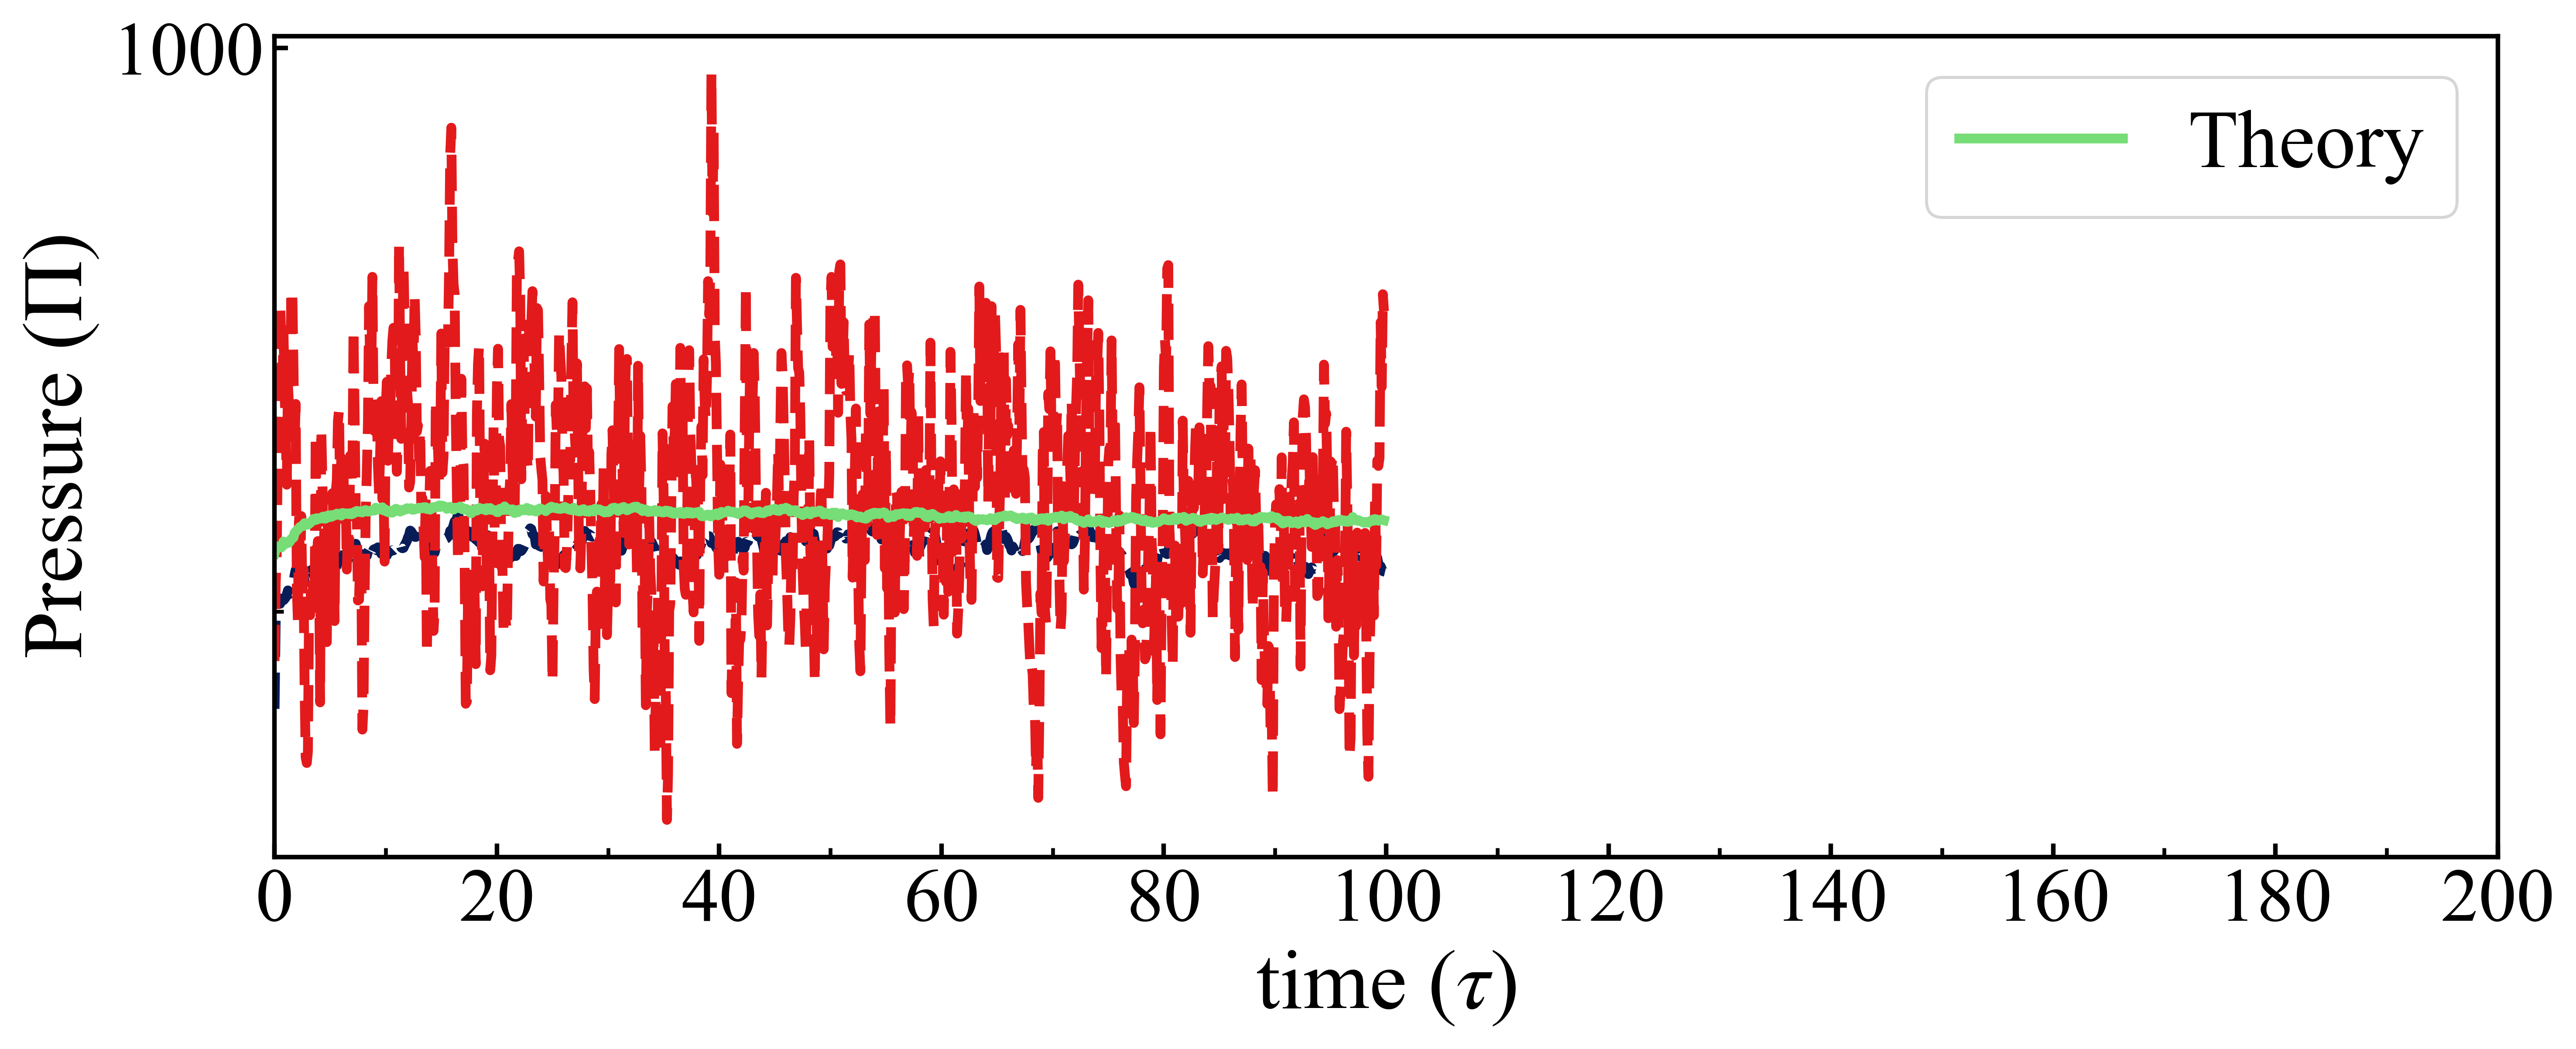

100
450


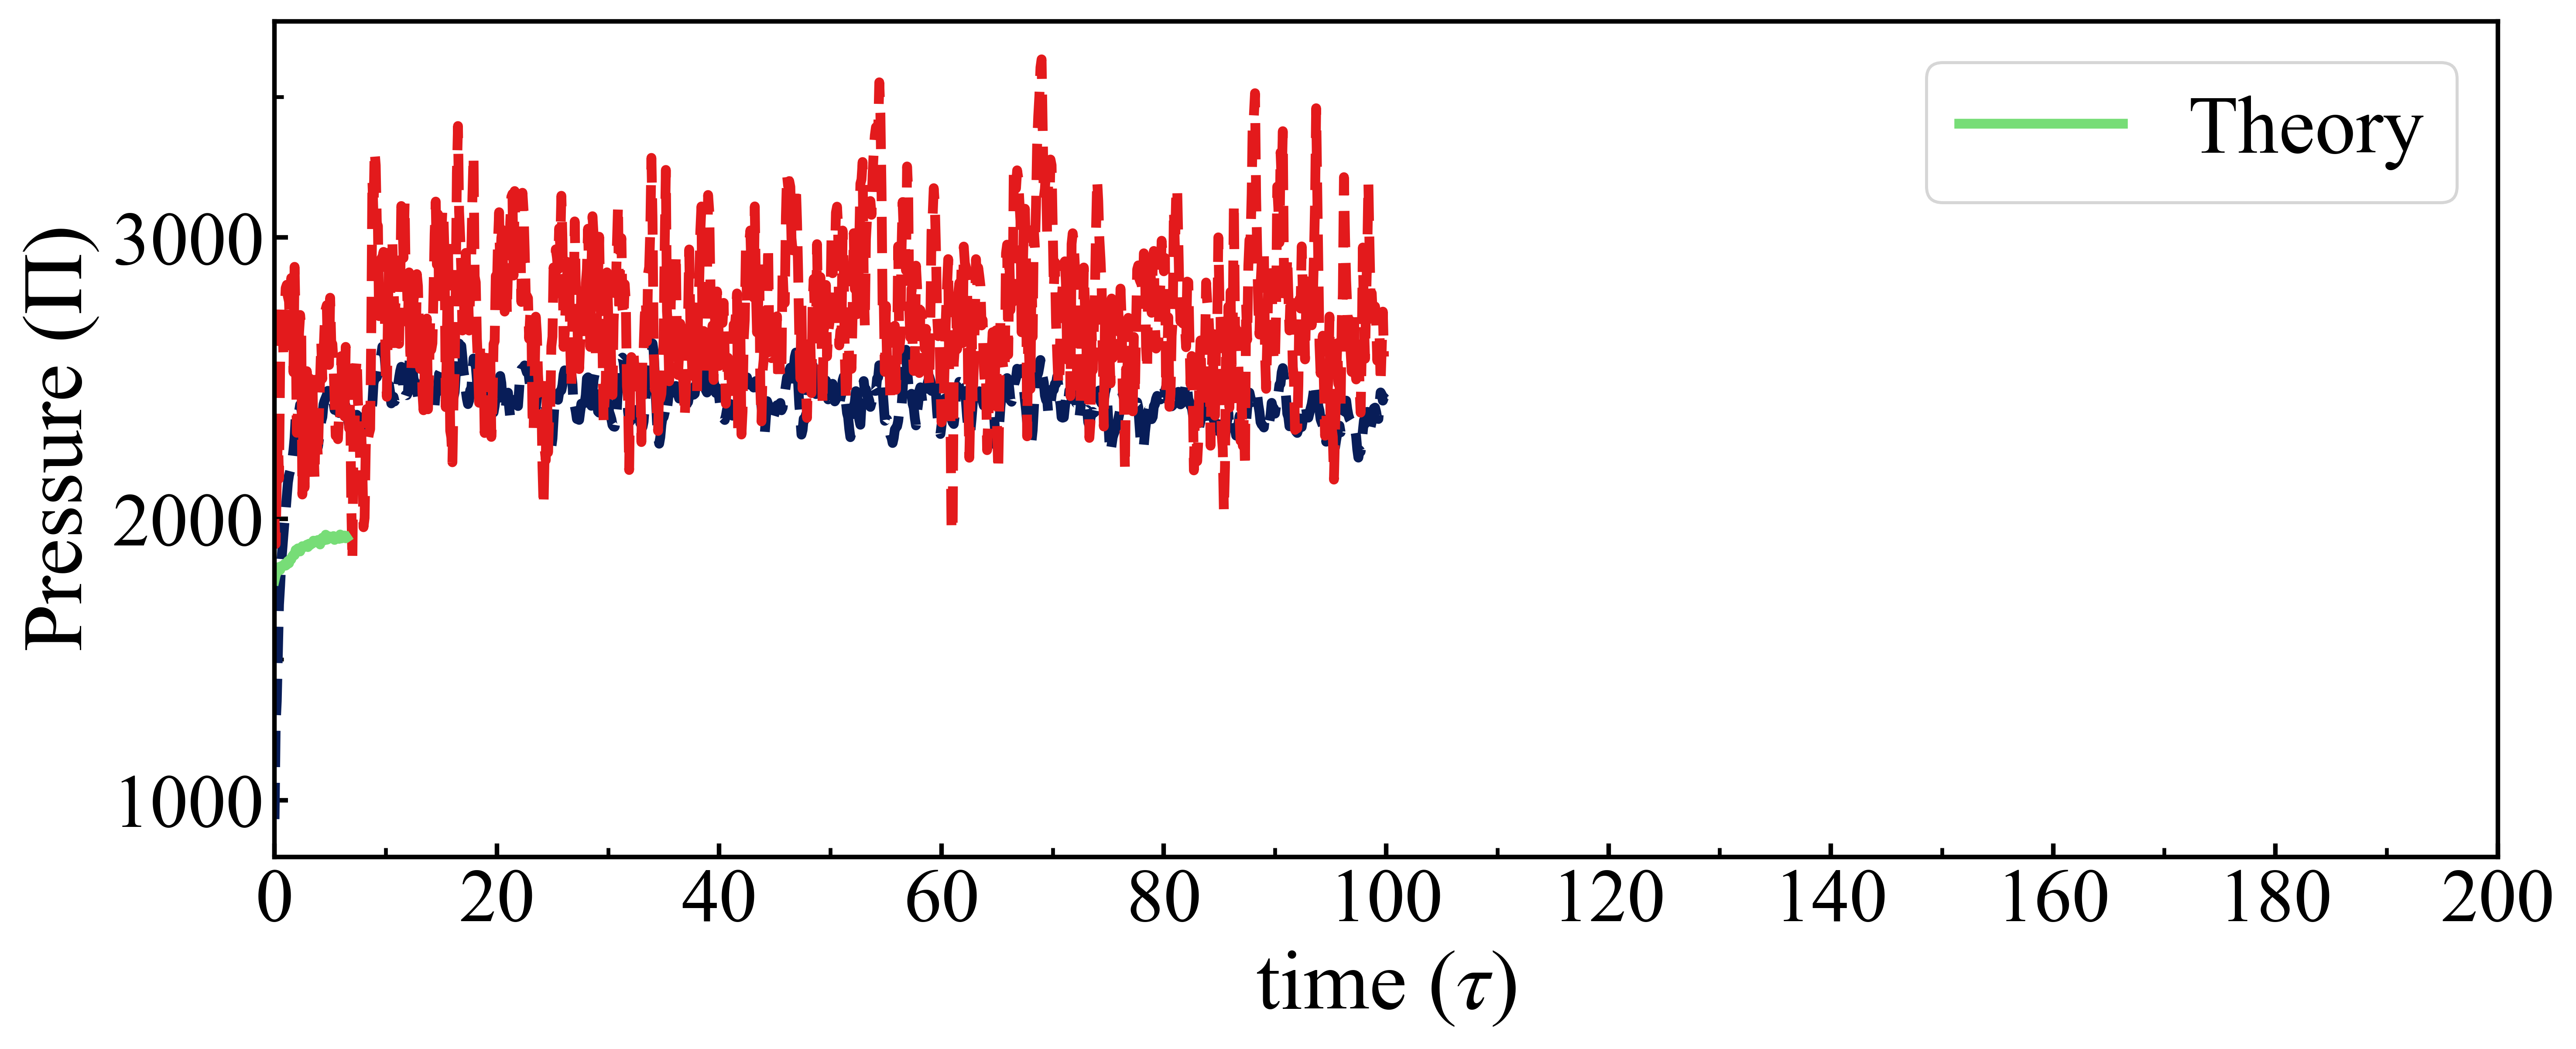

100
500


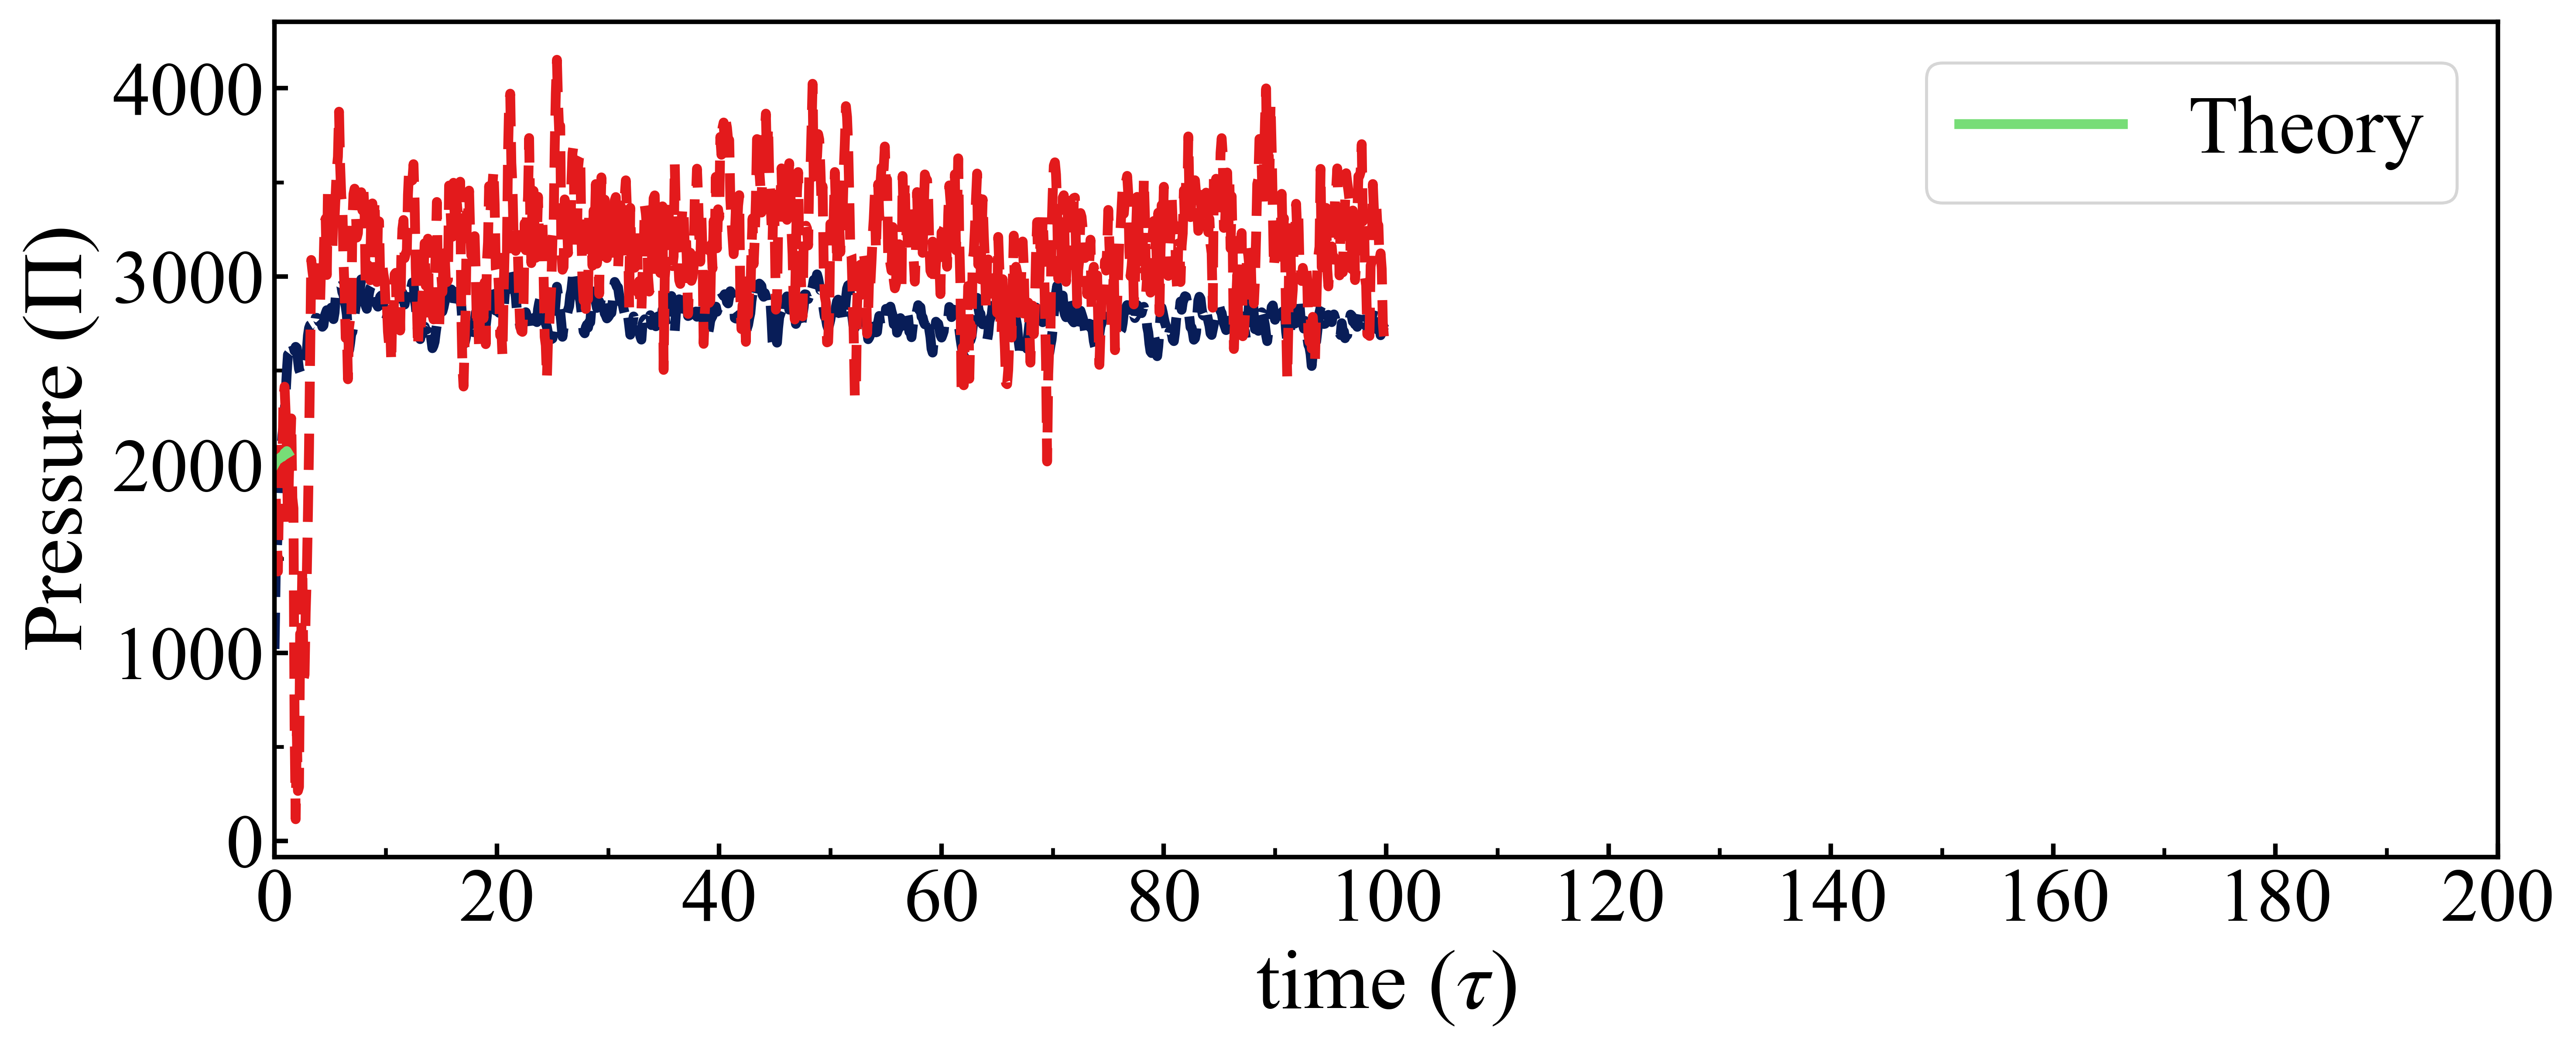

100
300


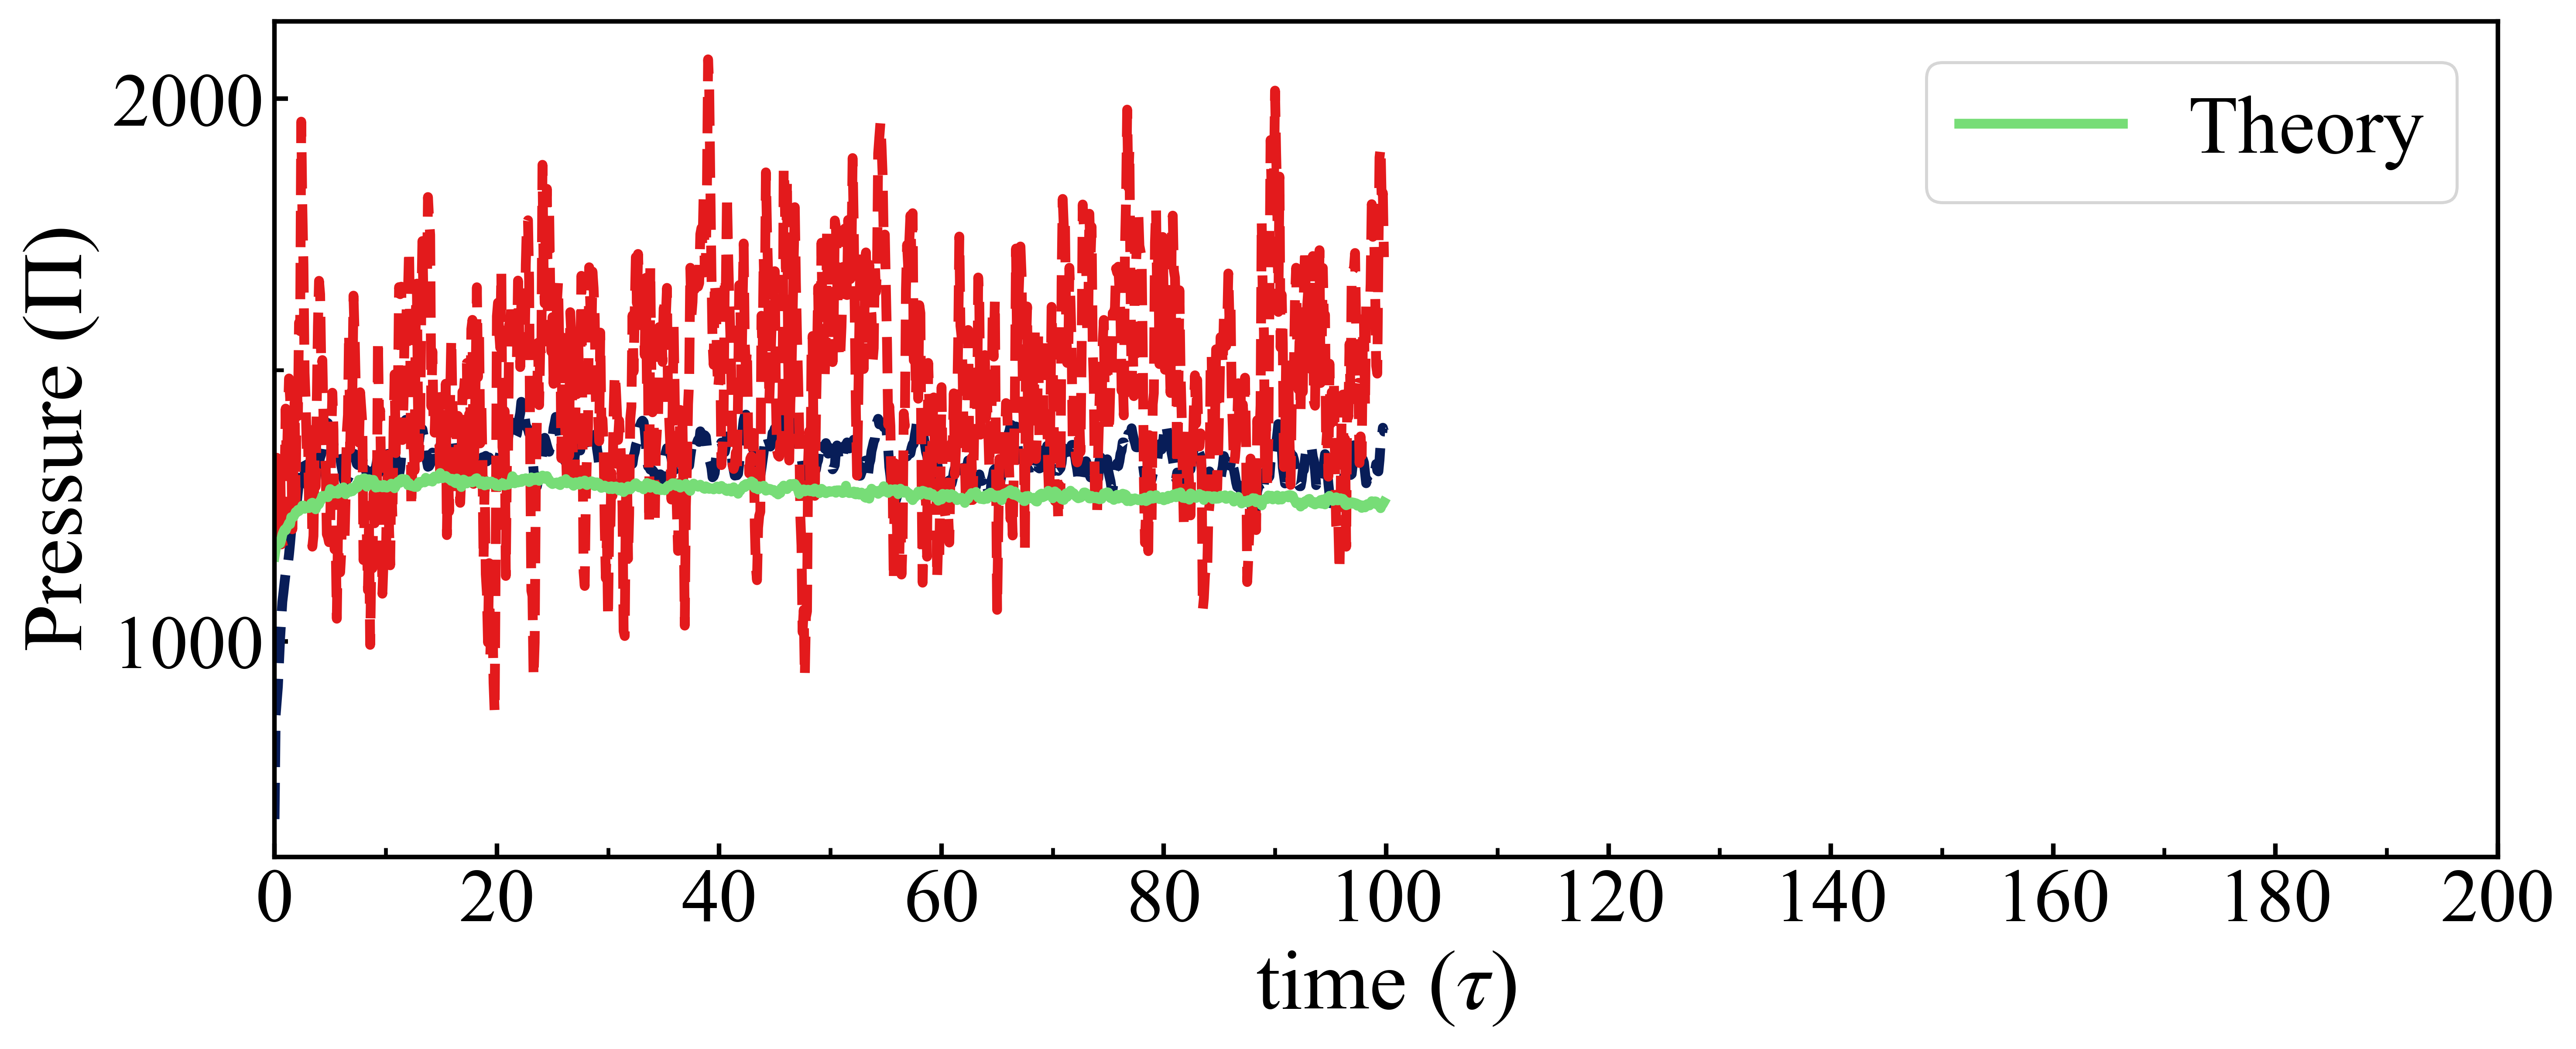

100
250


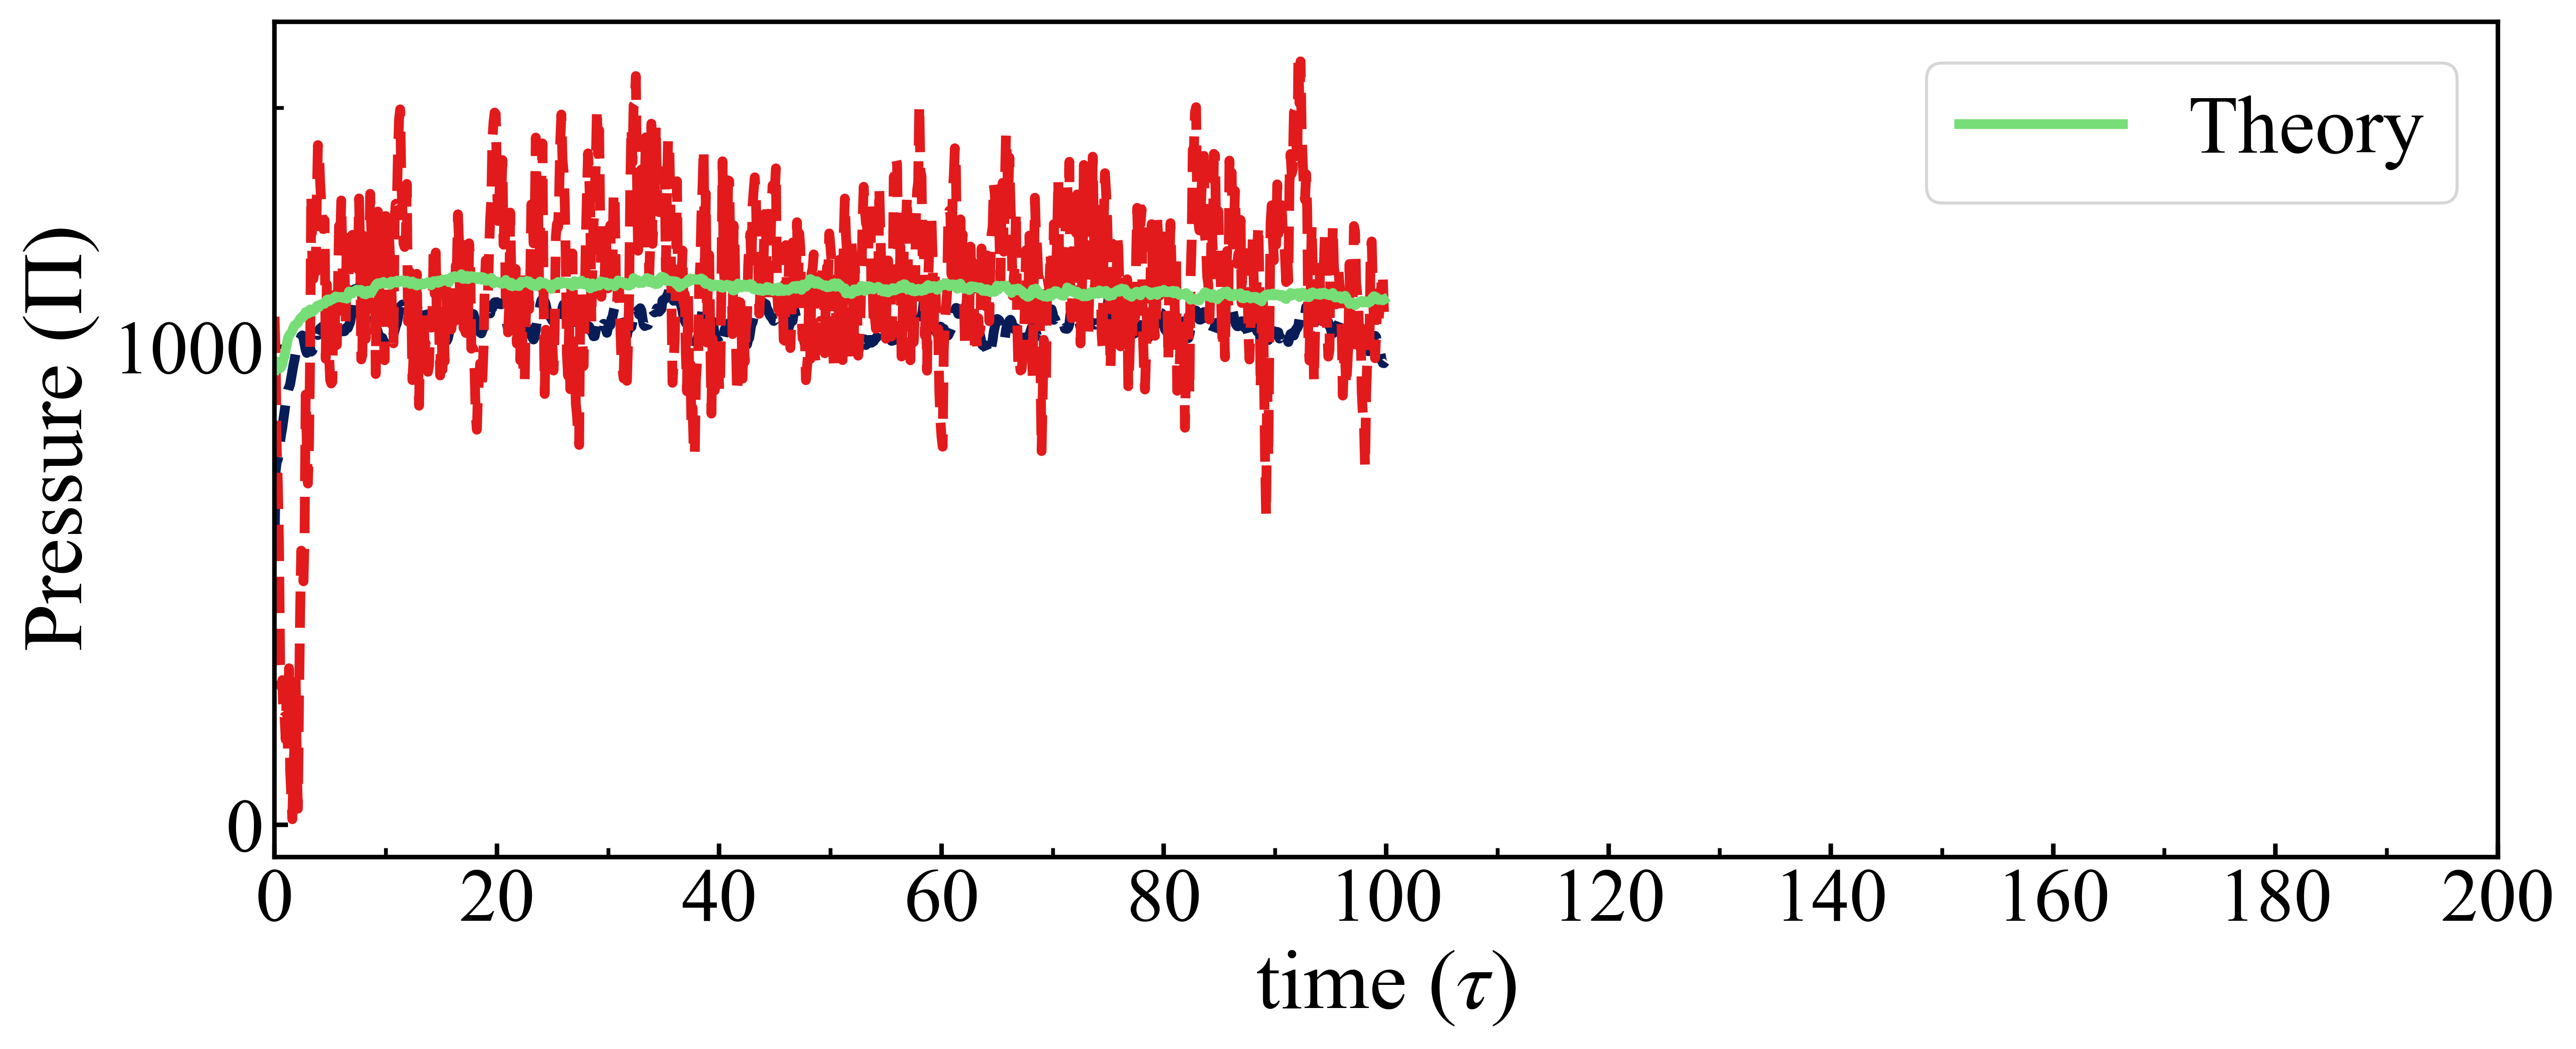

100
400


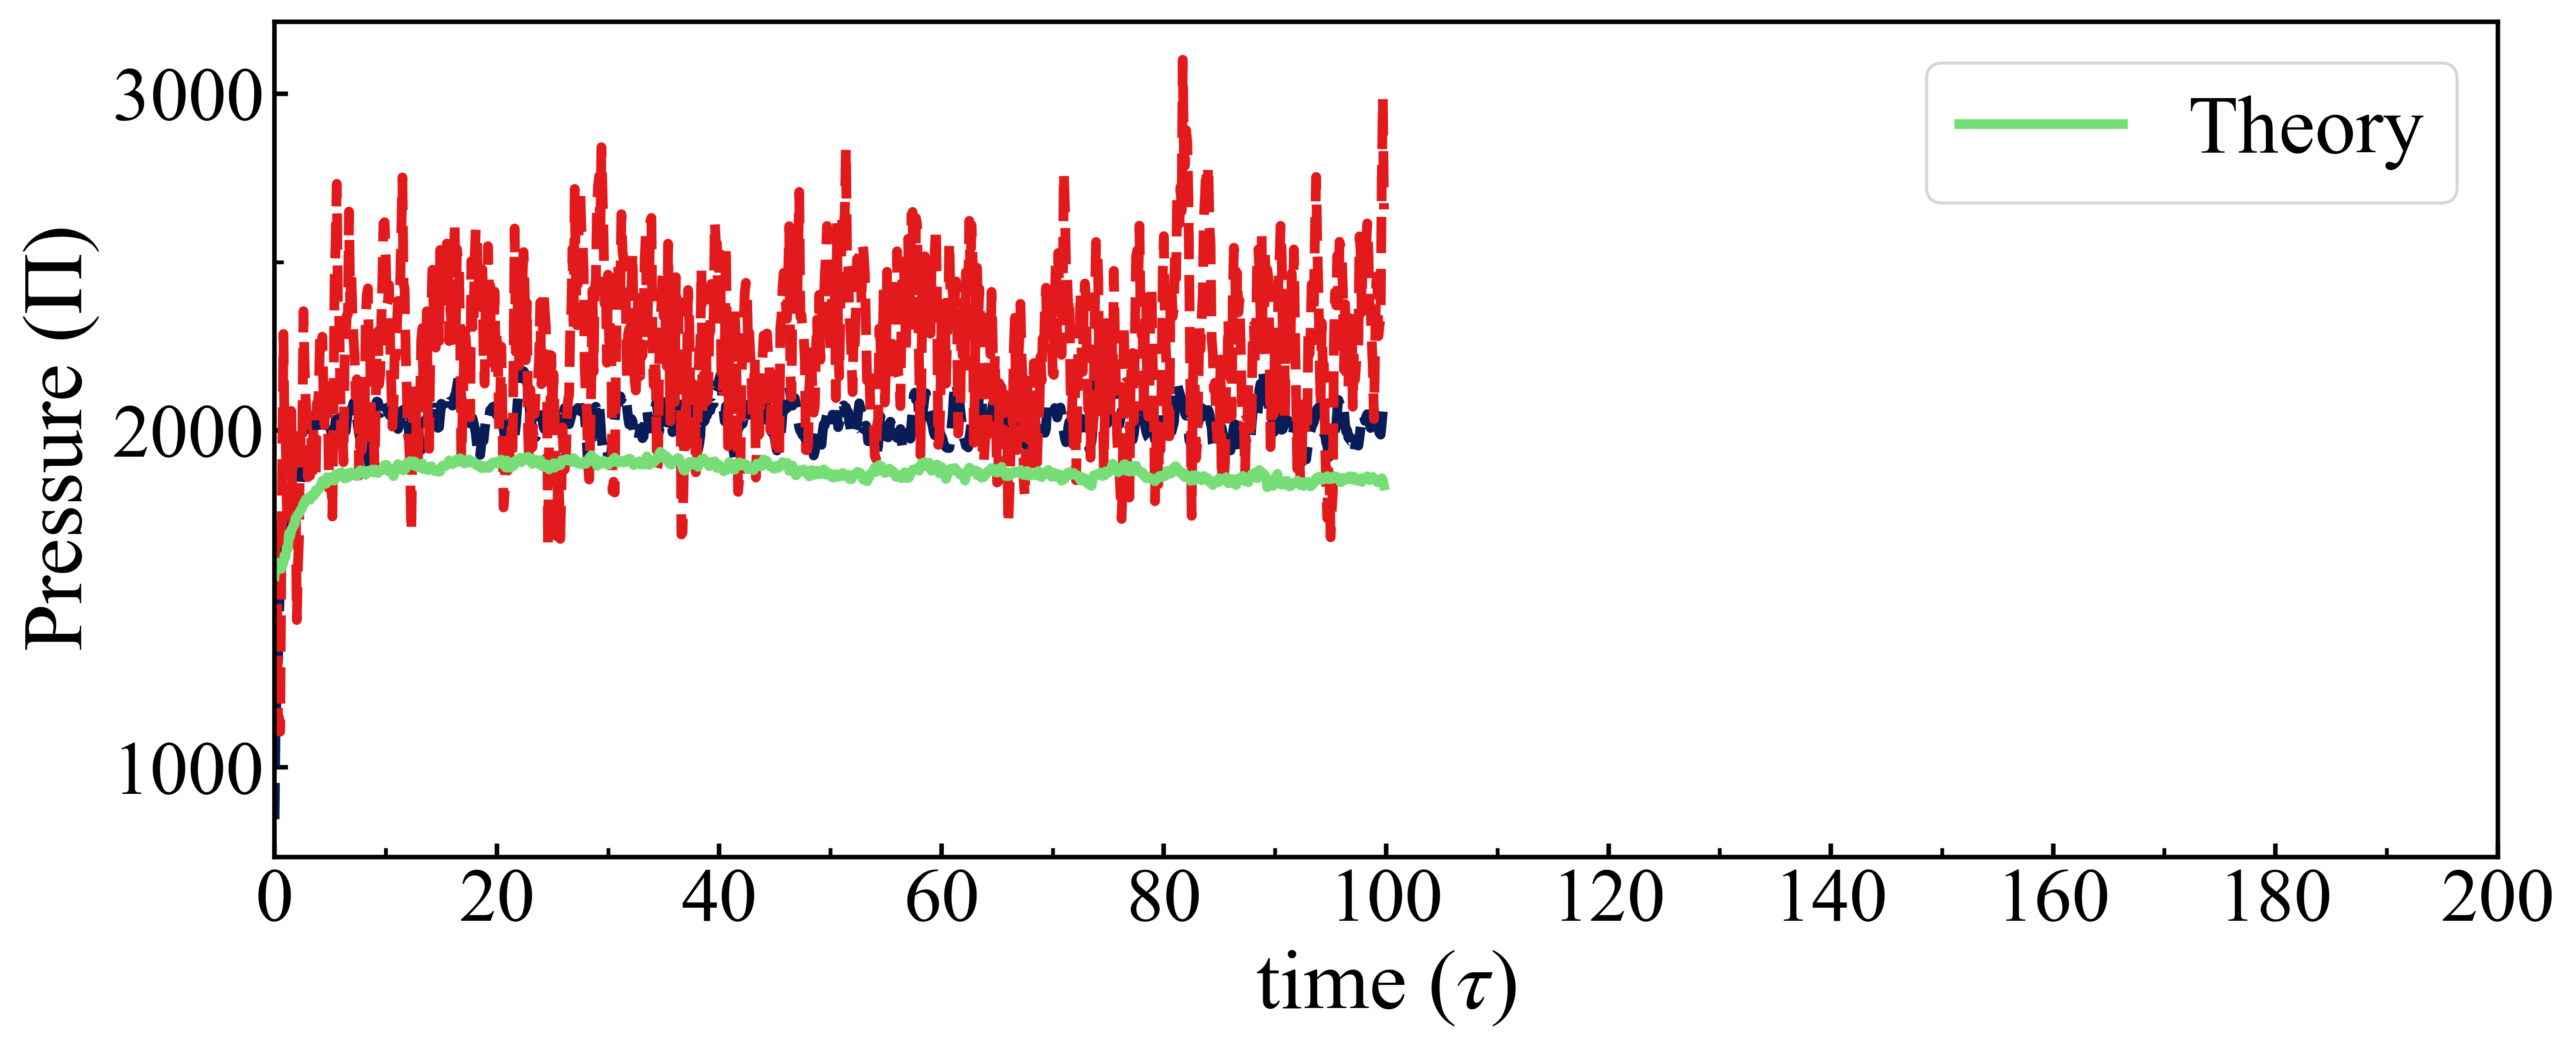

100
200


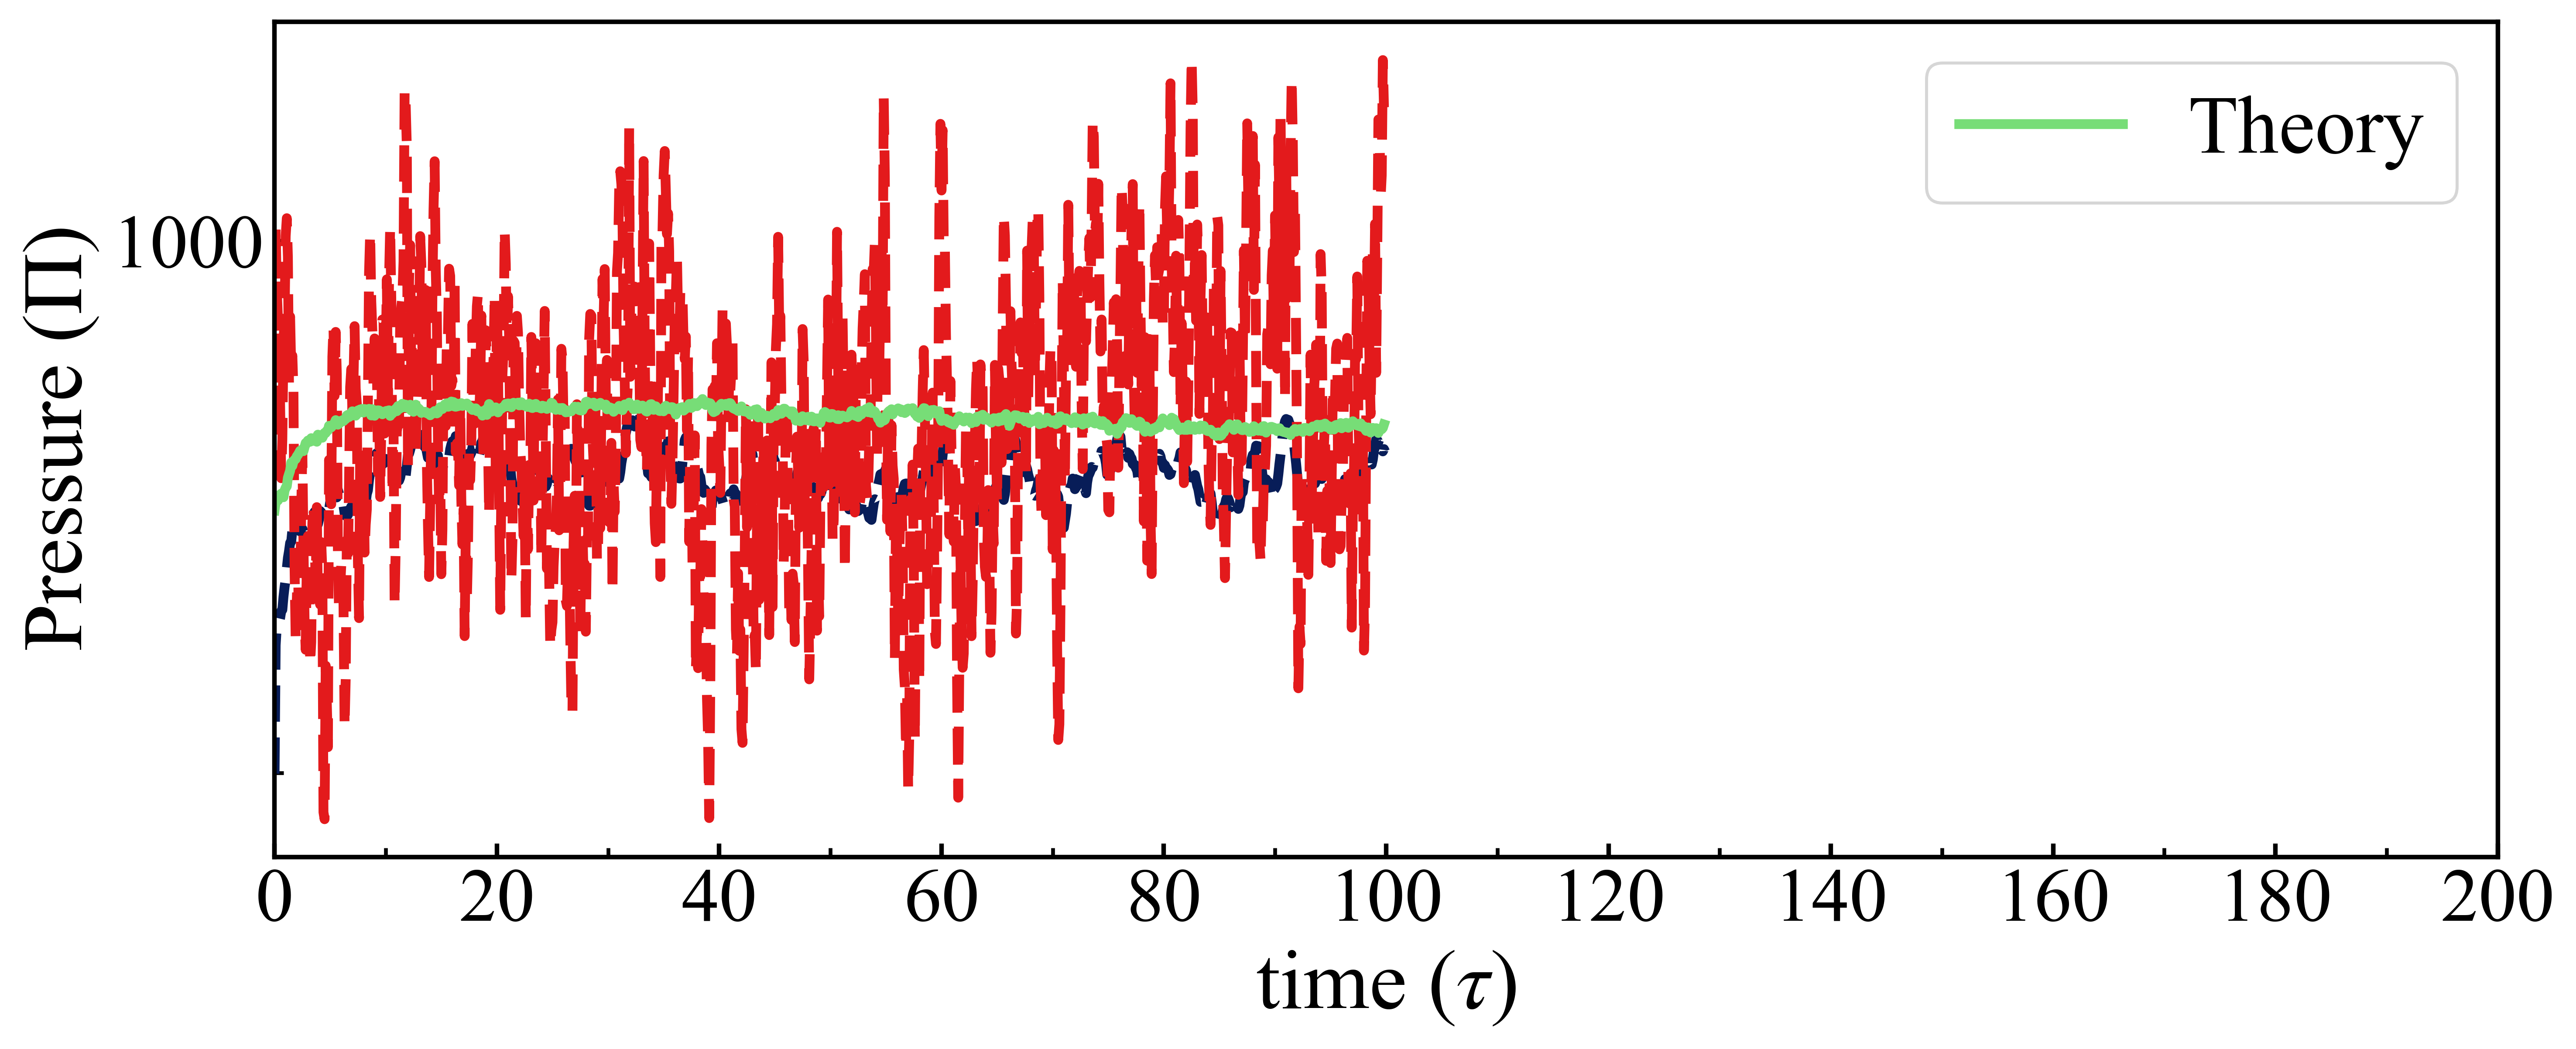

100
350


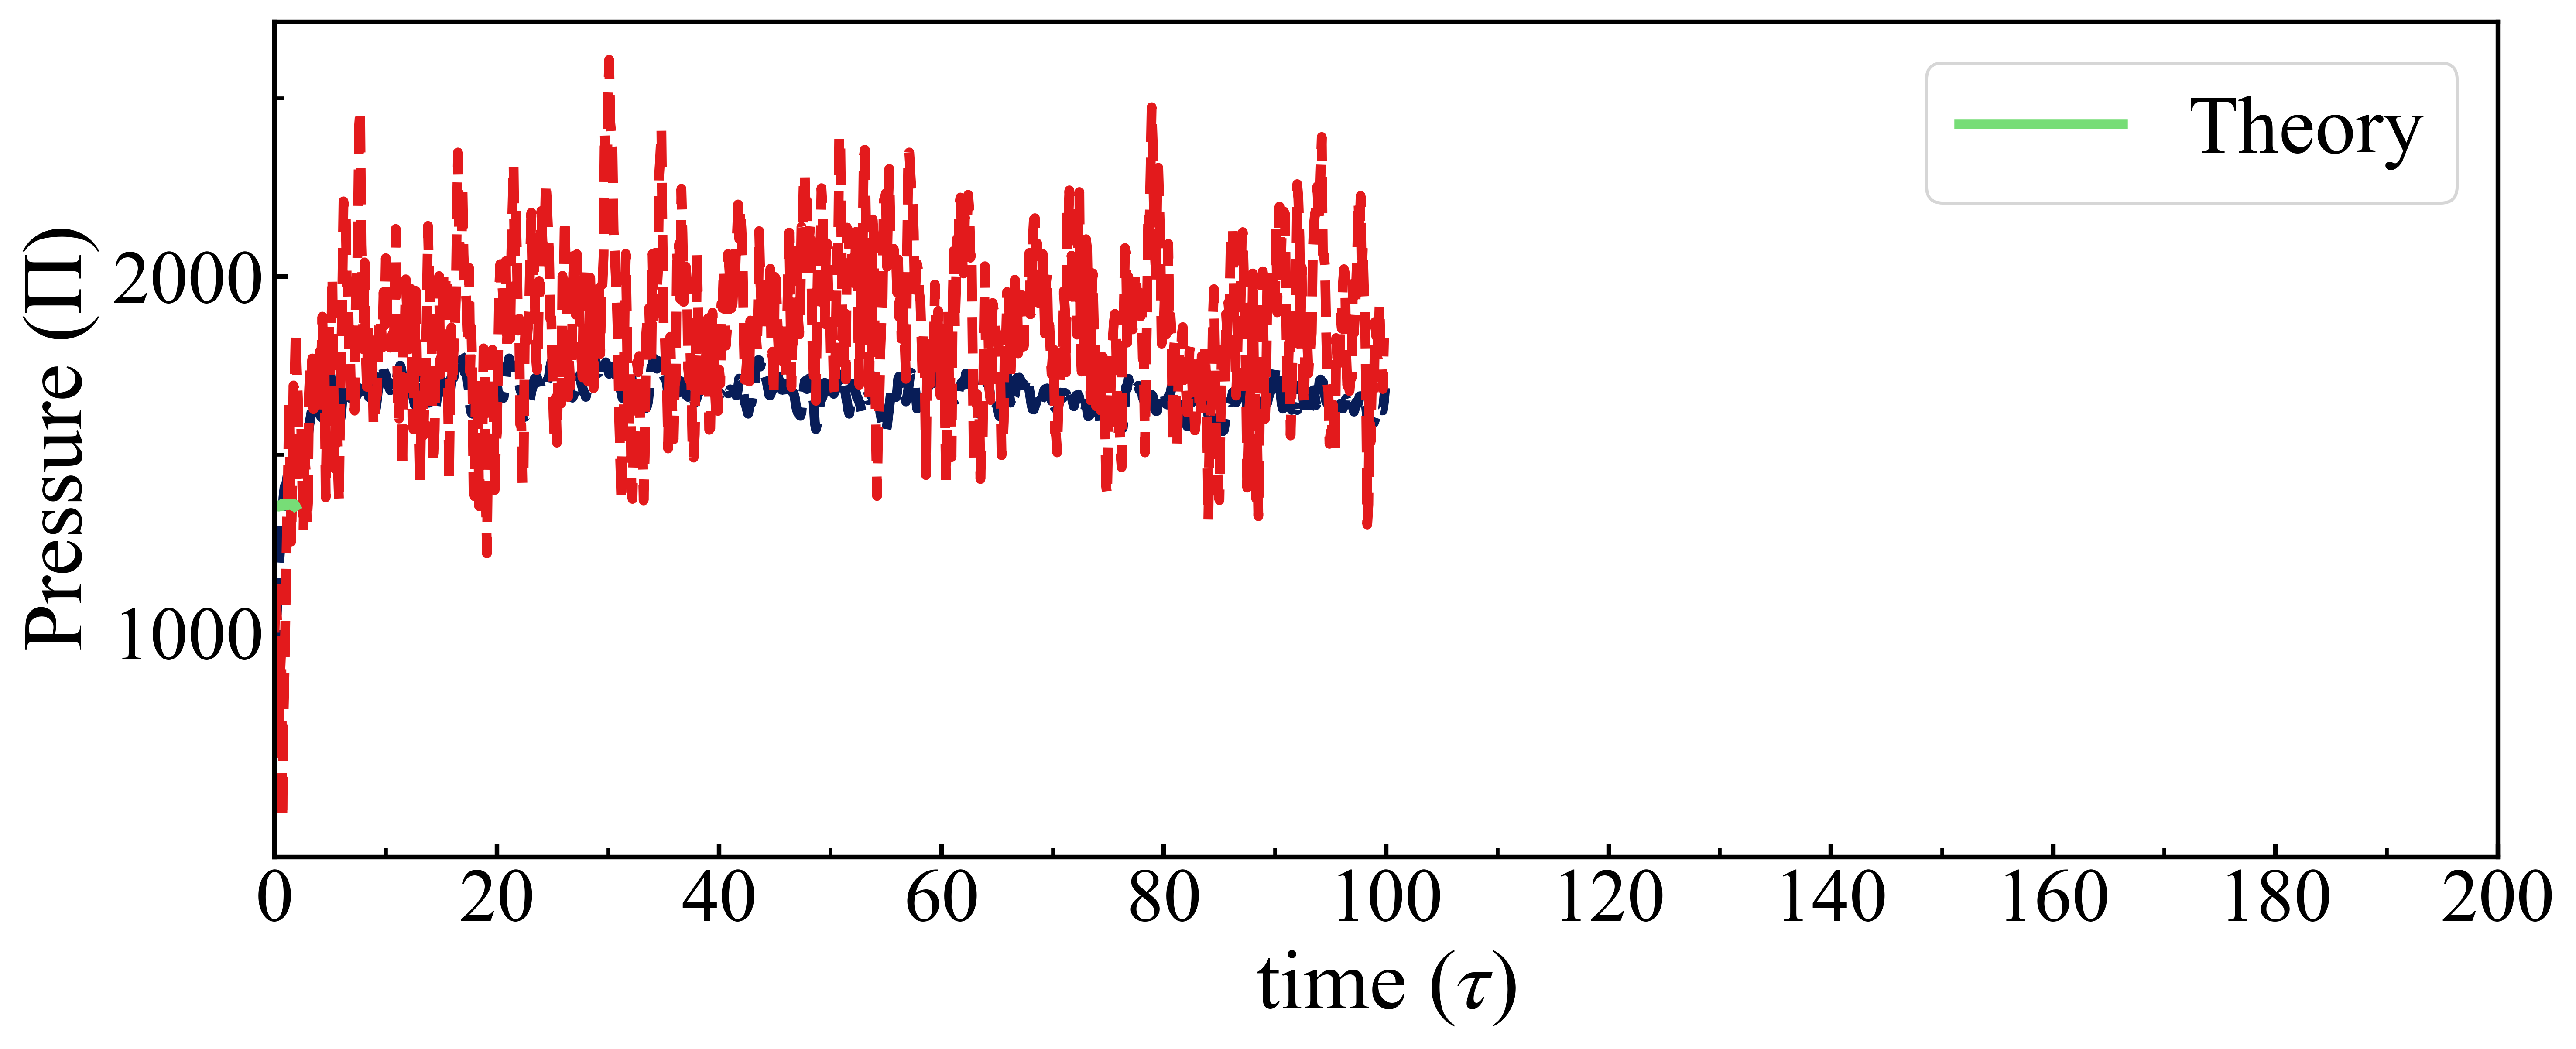

100
100


KeyboardInterrupt: 

In [31]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])
first_interpart_peNet=np.array([])
first_interpart_peA=np.array([])
first_interpart_peB=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_bulk_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
fastCol = '#e31a1c'
slowCol = '#081d58'

align_peAs=np.array([])
align_peBs=np.array([])
align_peNets=np.array([])
first_align_peNets=np.array([])
first_interpart_peNets=np.array([])
first_interpart_peAs=np.array([])
first_interpart_peBs=np.array([])

align_xAs=np.array([])
align_epss=np.array([])
align_pnums=np.array([])
align_phis=np.array([])
align_press_arrs = np.array([])
first_align_presss = np.array([])
first_bulk_presss = np.array([])
first_align_peAs=np.array([])
first_align_peBs=np.array([])

interpart_peAs=np.array([])
interpart_peBs=np.array([])
interpart_peNets=np.array([])
interpart_xAs=np.array([])
interpart_epss=np.array([])
interpart_pnums=np.array([])
interpart_phis=np.array([])
interpart_presss=np.array([])
interpart_press_expands=np.array([])
avg_shears=np.array([])

for i in range(0, len(all_dens)):
    if params['peA'][i]>=100:
        align_time =np.array([])
        align_press_time = np.array([])
        align_press_total = 0
        align_press_vals=0

        # Don't plot non-phase-separated data
        if all_dens[i].empty:
                continue

        largest_bubble = np.array([])
        second_largest_bubble = np.array([])
        third_largest_bubble = np.array([])
        fourth_largest_bubble = np.array([])
        fifth_largest_bubble = np.array([])
        tot_time_arr = np.array([])
        max_size = np.amax(all_dens[i]['clust_size'])
        for j in range(0, len(all_dens[i]['clust_size'])):
            #if all_dens[i]['clust_size'][j]>=0.95*max_size:
                tot_time_arr = np.append(tot_time_arr, all_dens[i]['tauB'][j])

                align_press = all_dens[i]['press_align'][j]

                if j==0:
                    first_align_press = np.append(first_align_press, align_press)
                    first_align_peNet=np.append(first_align_peNet, params['peB'][i] * (1-params['xA'][i]/100) + params['peA'][i] * (params['xA'][i]/100))
                    first_align_peA=np.append(first_align_peA, params['peA'][i])
                    first_align_peB=np.append(first_align_peB, params['peB'][i])

                if align_press > 0:
                    align_time = np.append(align_time, all_dens[i]['tauB'].iloc[j])
                    align_press_time = np.append(align_press_time, align_press)

                    align_press_total += align_press
                    align_press_vals += 1
        if align_press_vals > 50:        
            avg_press = (align_press_total/align_press_vals)
            align_press_arr = np.append(align_press_arr, avg_press)
            align_peA=np.append(align_peA, params['peA'][i])
            align_peB=np.append(align_peB, params['peB'][i])
            align_peNet=np.append(align_peNet, params['peB'][i] * (1-params['xA'][i]/100) + params['peA'][i] * (params['xA'][i]/100))
            align_xA=np.append(align_xA, params['xA'][i])
            align_phi=np.append(align_phi, params['phi'][i])
            align_eps=np.append(align_eps, params['eps'][i])


        for k in range(0, len(all_pres)):
            if params2['peA'][k]==params['peA'][i]:
                if params2['peB'][k]==params['peB'][i]:
                        bulk_time =np.array([])
                        bulk_press_time = np.array([])
                        bulk_press_total = 0
                        bulk_press_total_expand = 0
                        bulk_press_vals=0
                        shear_press_expand=0
                        # Don't plot non-phase-separated data
                        if all_pres[k].empty:
                                continue


                        max_size = np.amax(all_pres[k]['NDense'])
                        for l in range(0, len(all_pres[k]['NDense'])):


                            #if all_pres[i]['NDense'][j]>=0.95*max_size:

                            bulk_trace = (all_pres[k]['bulkSigXX'].iloc[l]+all_pres[k]['bulkSigYY'].iloc[l])/2#+all_pres_new[i]['bulkSigYX'].iloc[-1]+all_pres_new[i]['bulkSigYY'].iloc[-1])/2
                            bulk_press = bulk_trace / (all_pres[k]['bulkArea'].iloc[l])

                            bulk_trace_expand = (all_pres[k]['bulkSigXX'].iloc[l]+all_pres[k]['bulkSigXY'].iloc[l]+all_pres[k]['bulkSigYX'].iloc[l]+all_pres[k]['bulkSigYY'].iloc[l])/2
                            bulk_press_expand = bulk_trace_expand / (all_pres[k]['bulkArea'].iloc[l])
                            if l == 0:
                                first_bulk_press = np.append(first_bulk_press, bulk_press)
                                first_interpart_peNet=np.append(first_interpart_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                                first_interpart_peA=np.append(first_interpart_peA, params2['peA'][k])
                                first_interpart_peB=np.append(first_interpart_peB, params2['peB'][k])

                            shear_stress = (all_pres[k]['bulkSigXY'].iloc[l]+all_pres[k]['bulkSigYX'].iloc[l])/2
                            shear_press = shear_stress / (all_pres[k]['bulkArea'].iloc[l])
                            if bulk_press>0:
                                bulk_time = np.append(bulk_time, all_pres[k]['Timestep'].iloc[l])
                                bulk_press_time = np.append(bulk_press_time, bulk_press/2)
                                shear_press_expand +=shear_press
                                bulk_press_total += bulk_press
                                bulk_press_total_expand += bulk_press_expand
                                bulk_press_vals += 1
                        if bulk_press_vals > 50:        
                            avg_shear = np.append(avg_shear, shear_press_expand/bulk_press_vals)
                            avg_press = (bulk_press_total/(2*bulk_press_vals))
                            avg_press_expand = (bulk_press_total_expand/bulk_press_vals)
                            interpart_press=np.append(interpart_press, avg_press)
                            interpart_press_expand=np.append(interpart_press_expand, avg_press_expand)
                            interpart_peA=np.append(interpart_peA, params2['peA'][k])
                            interpart_peB=np.append(interpart_peB, params2['peB'][k])
                            interpart_peNet=np.append(interpart_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                            interpart_xA=np.append(interpart_xA, params2['xA'][k])
                            interpart_phi=np.append(interpart_phi, params2['phi'][k])
                            interpart_eps=np.append(interpart_eps, params2['eps'][k])


                        for q in range(0, len(all_pres_new2)):
                            if params3['peA'][q]==params['peA'][i]:
                                if params3['peB'][q]==params['peB'][i]:

                                    time_arr3 = np.array([])
                                    bulk_nA_arr = np.array([])
                                    bulk_nB_arr = np.array([])
                                    bulk_n_arr = np.array([])
                                    int_n_arr = np.array([])
                                    int_nA_arr = np.array([])
                                    int_nB_arr = np.array([])
                                    gas_nA_arr = np.array([])
                                    gas_nB_arr = np.array([])
                                    dense_nA_arr = np.array([])
                                    dense_nB_arr = np.array([])
                                    dense_n_arr = np.array([])

                                    for j in range(0, len(all_pres_new2[q]['clust_size'])):
                                        #if all_dens[i]['clust_size'][j]>=0.95*max_size:
                                            bin_size = all_pres_new2[q]['sizeBin'][j]
                                            bin_area = bin_size**2
                                            time_arr3 = np.append(time_arr3, all_pres_new2[q]['tauB'][j])
                                            bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new2[q]['Na_bulk'][j] / (bin_area * all_pres_new2[q]['NBin_bulk'][j]))
                                            bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new2[q]['Nb_bulk'][j] / (bin_area * all_pres_new2[q]['NBin_bulk'][j]))
                                            bulk_n_arr = np.append(bulk_n_arr, (all_pres_new2[q]['Nb_bulk'][j]+all_pres_new2[q]['Na_bulk'][j]) / (bin_area * all_pres_new2[q]['NBin_bulk'][j]))
                                            int_n_arr = np.append(int_n_arr, (all_pres_new2[q]['Na_int'][j]+all_pres_new2[q]['Nb_int'][j]) / (bin_area * all_pres_new2[q]['NBin_int'][j]))
                                            int_nA_arr = np.append(int_nA_arr, all_pres_new2[q]['Na_int'][j] / (bin_area * all_pres_new2[q]['NBin_int'][j]))
                                            int_nB_arr = np.append(int_nB_arr, all_pres_new2[q]['Nb_int'][j] / (bin_area * all_pres_new2[q]['NBin_int'][j]))
                                            gas_nA_arr = np.append(gas_nA_arr, all_pres_new2[q]['Na_gas'][j] / (bin_area * all_pres_new2[q]['NBin_gas'][j]))
                                            gas_nB_arr = np.append(gas_nB_arr, all_pres_new2[q]['Nb_gas'][j] / (bin_area * all_pres_new2[q]['NBin_gas'][j]))
                                            dense_n_arr = np.append(dense_n_arr, (all_pres_new2[q]['Na_int'][j]+all_pres_new2[q]['Nb_int'][j]+all_pres_new2[q]['Na_bulk'][j]+all_pres_new2[q]['Nb_bulk'][j]) / (bin_area * (all_pres_new2[q]['NBin_int'][j]+all_pres_new2[q]['NBin_bulk'][j])))
                                            dense_nA_arr = np.append(dense_nA_arr, (all_pres_new2[q]['Na_int'][j]+all_pres_new2[q]['Na_bulk'][j]) / (bin_area * (all_pres_new2[q]['NBin_int'][j]+all_pres_new2[q]['NBin_bulk'][j])))
                                            dense_nB_arr = np.append(dense_nB_arr, (all_pres_new2[q]['Nb_int'][j]+all_pres_new2[q]['Nb_bulk'][j]) / (bin_area * (all_pres_new2[q]['NBin_int'][j]+all_pres_new2[q]['NBin_bulk'][j])))



                                    print(params['peA'][i])
                                    print(params['peB'][i])
                                    peNet_int = (((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])))

                                    peNet = params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100)
                                    latNet_int = np.zeros(len(peNet_int))
                                    for z in range(0, len(peNet_int)):
                                        latNet_int[z] = getLat(peNet_int[z] - 50, 1.0)


                                    theoryss = (peNet_int-50) * 2 * 1.92 * np.sqrt(3) / latNet_int


                                    #x_range2 = np.array([10000000, 20000000])
                                    #y_range2 = np.array([theoryss, theoryss])

                                    #x_range_int = np.array([0.3, 0.3+0.0000000000001])
                                    #y_range_int = np.array([-1000000, 1000000])

                                    fsize=10
                                    mpl.rcParams.update({'font.size': 13})
                                    mkSz = [0.1, 0.1, 0.15, 0.1, 0.1]
                                    msz=40
                                    yellow = ("#fec44f")
                                    green = ("#77dd77")
                                    red = ("#ff6961")
                                    fig, ax1 = plt.subplots(figsize=(12,5))

                                    nonzero_bulk = np.where(bulk_press_time>0)[0]
                                    nonzero_align = np.where(align_press_time>0)[0]

                                    plt.plot(bulk_time[nonzero_bulk], bulk_press_time[nonzero_bulk],
                                                   c=slowCol, lw=1.8*1.8, ls='--')
                                    plt.plot(align_time[nonzero_align], align_press_time[nonzero_align],
                                                   c=fastCol, lw=1.8*1.8, ls='--')
                                    plt.plot(time_arr3, theoryss,
                                                   c=green, lw=1.8*1.8, ls='-', label='Theory')
                                    ax1.set_xlim(0, 200)        
                                    # y limits


                                    #ax1.set_ylim(0, 5000) 


                                    ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                    ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                    # Set all the x ticks for radial plots
                                    loc = ticker.MultipleLocator(base=20)
                                    ax1.xaxis.set_major_locator(loc)
                                    loc = ticker.MultipleLocator(base=10)
                                    ax1.xaxis.set_minor_locator(loc)


                                    # Set y ticks
                                    loc = ticker.MultipleLocator(base=1000)
                                    ax1.yaxis.set_major_locator(loc)
                                    loc = ticker.MultipleLocator(base=500)
                                    ax1.yaxis.set_minor_locator(loc)
                                    # Left middle plot
                                    plt.legend(loc='upper right', fontsize=fsize*2.7)

                                    ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                    ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                    plt.tight_layout()
                                    plt.show()




import matplotlib.patches as mpatches
from matplotlib import cm
import matplotlib.patches as patches

stop
        
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
div_min = -3
min_n = 0
max_n = 20
levels_text=40
level_boundaries = np.linspace(min_n, max_n, levels_text + 1)
tick_locs   = [0.0,np.pi/6,np.pi/3]
tick_labels = ['0',r'$\pi/6$',r'$\pi/3$']

im = plt.scatter(first_interpart_peNet, first_bulk_press, linewidths=1.0, edgecolor='black', facecolor='green', s=60.0)
im = plt.scatter(first_align_peNet, first_align_press, linewidths=1.0, edgecolor='black', facecolor='yellow', s=60.0)
         
yellow_patch = mpatches.Patch(color='yellow', label='Fast Interface')
red_patch = mpatches.Patch(color='green', label='Slow Bulk')
plt.legend(handles=[yellow_patch, red_patch], fancybox=True, framealpha=0.75, ncol=1, fontsize=12, loc='upper left',labelspacing=0.1, handletextpad=0.1)

    
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$', fontsize=20)
plt.ylabel(r'Initial Pressure ($\Pi$)', fontsize=20)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
div_min = -3
min_n = 0
max_n = 20
levels_text=40
level_boundaries = np.linspace(min_n, max_n, levels_text + 1)
tick_locs   = [0.0,np.pi/6,np.pi/3]
tick_labels = ['0',r'$\pi/6$',r'$\pi/3$']
for i in range(0, len(first_bulk_press)):
    for j in range(0, len(press_fast_dense)):
        if (first_interpart_peA[i]==pa_pair[j]) and (first_interpart_peB[i]==pb_pair[j]):
            im = plt.scatter(first_interpart_peNet[i], ((first_bulk_press[i] - press_slow_dense[j])/press_slow_dense[j])*100, linewidths=1.0, edgecolor='black', facecolor='green', s=60.0)
        elif (first_interpart_peB[i]==pa_pair[j]) and (first_interpart_peA[i]==pb_pair[j]):
            im = plt.scatter(first_interpart_peNet[i], ((first_bulk_press[i] - press_slow_dense[j])/press_slow_dense[j])*100, linewidths=1.0, edgecolor='black', facecolor='green', s=60.0)
for i in range(0, len(first_align_press)):
    for j in range(0, len(press_slow_int)):
        if (first_align_peA[i]==pa_pair[j]) and (first_align_peB[i]==pb_pair[j]):
            im = plt.scatter(first_align_peNet[i], ((first_align_press[i]-press_fast_int[j])/press_fast_int[j])*100, linewidths=1.0, edgecolor='black', facecolor='yellow', s=60.0)
        elif (first_align_peB[i]==pa_pair[j]) and (first_align_peA[i]==pb_pair[j]):
            im = plt.scatter(first_align_peNet[i], ((first_align_press[i]-press_fast_int[j])/press_fast_int[j])*100, linewidths=1.0, edgecolor='black', facecolor='yellow', s=60.0)
yellow_patch = mpatches.Patch(color='yellow', label='Fast Interface')
red_patch = mpatches.Patch(color='green', label='Slow Bulk')
plt.legend(handles=[yellow_patch, red_patch], fancybox=True, framealpha=0.75, ncol=1, fontsize=12, loc='upper left',labelspacing=0.1, handletextpad=0.1)

    
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$', fontsize=20)
plt.ylabel('Percent Error (%)', fontsize=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(first_interpart_peNet, first_bulk_press, s=10.0, color='blue', label='bulk interparticle')
plt.scatter(first_align_peNet, first_align_press, s=10.0, color='red', label='aligned interface')


plt.title('fast interface, slow bulk (stable)', fontsize=22)
plt.ylabel(r'Initial Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend(loc='upper left')
plt.ylim([-2500, 25000])
plt.show() 
stop

plt.figure(figsize=(8,6))
plt.scatter(interpart_peNet, interpart_press, c='blue', label='bulk interparticle')
plt.scatter(align_peNet, align_press_arr, c='red', label='aligned interface')
plt.ylabel(r'Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend()
plt.show()

    
'''
for i in range(0, len(align_peA)):  
    for j in range(0, len(align_peB)):  
        for k in range(0, len(interpart_peA)):  
            for l in range(0, len(interpart_peB)):  
                if (align_peA[i]==interpart_peA[k]) & (align_peB[j]==interpart_peB[l]):
                    
'''